<a href="https://colab.research.google.com/github/sebamelies/Olist/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de los datos

In [ ]:
# SetUp
palette = ["#7400b8","#6930c3","#5e60ce","#5390d9","#4ea8de","#48bfe3","#56cfe1","#64dfdf","#72efdd","#80ffdb"]

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import glob
import os

import numpy as np

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')


from scipy.stats import f_oneway

Mounted at /content/drive


In [ ]:
dataframes = {
  'customer_with_geolocation': pd.read_parquet('/content//drive/MyDrive/e-commerce TFM/Data/df_customer_with_geolocation.parquet'),
  'order_items': pd.read_parquet('/content//drive/MyDrive/e-commerce TFM/Data/df_order_items.parquet'),
  'order_payments': pd.read_parquet('/content//drive/MyDrive/e-commerce TFM/Data/df_order_payments.parquet'),
  'translated_reviews': pd.read_parquet('/content//drive/MyDrive/e-commerce TFM/Data/df_translated_reviews.parquet'),
  'orders': pd.read_parquet('/content//drive/MyDrive/e-commerce TFM/Data/df_orders.parquet'),
  'products': pd.read_parquet('/content//drive/MyDrive/e-commerce TFM/Data/df_products.parquet'),
  'sellers': pd.read_parquet('/content//drive/MyDrive/e-commerce TFM/Data/df_sellers.parquet'),
  'categories': pd.read_parquet('/content//drive/MyDrive/e-commerce TFM/Data/df_product_category_name_translation.parquet'),
}

In [ ]:
df_customer_with_geolocation = dataframes['customer_with_geolocation']
df_order_items = dataframes['order_items']
df_order_payments = dataframes['order_payments']
df_translated_reviews = dataframes['translated_reviews']
df_orders = dataframes['orders']
df_products = dataframes['products']
df_sellers = dataframes['sellers']
df_product_category_name_translation = dataframes['categories']

In [ ]:
#Hacemos merge para unir df_customers_with_geolocation con df_orders
df_customer_geolocation_orders = pd.merge(df_customer_with_geolocation, df_orders, on='customer_id')

In [ ]:
df_customer_geolocation_orders.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_state', 'geolocation_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'customer_city', 'country', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

# ANÁLISIS UNIVARIABLE

### Análisis de variables categóricas

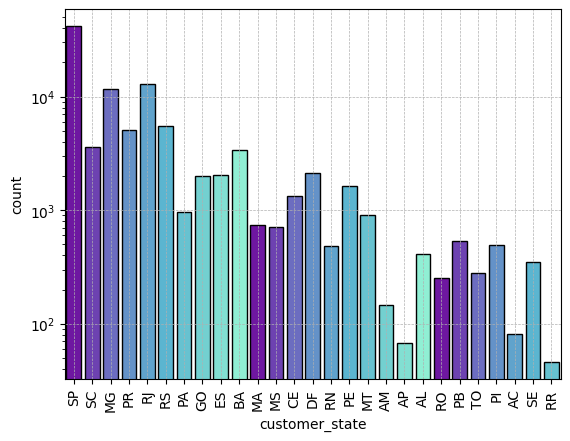

In [ ]:
#Tabla de customers estados
sns.countplot(
    data = df_customer_with_geolocation,
    x = 'customer_state',
    palette = palette,
    edgecolor = 'black'
)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.grid(ls = '--', lw = .5)
plt.show()

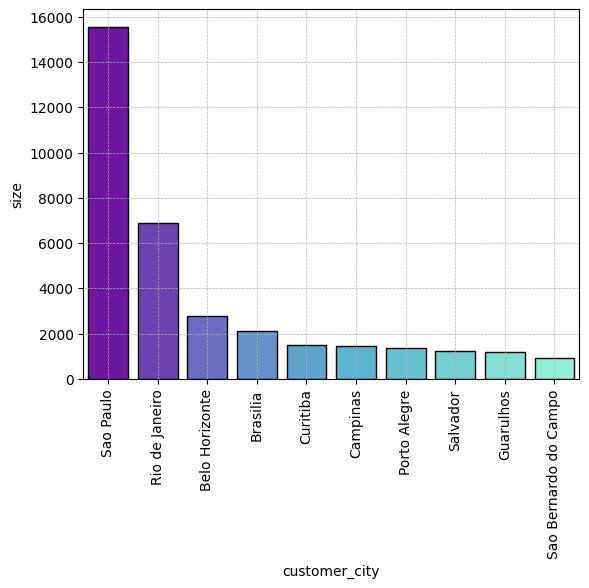

In [ ]:
# Número de clientes por ciudades
# Las 10 ciudades con más clientes
df_ = (
    df_customer_with_geolocation
    .groupby('customer_city', as_index = False)
    .size()
    .nlargest(10, 'size')
    .reset_index(drop = True)
)
sns.barplot(
    data = df_,
    x = 'customer_city',
    y = 'size',
    edgecolor = 'black',
    palette = palette,
)
plt.xticks(rotation = 90)
plt.grid(ls = '--', lw = 0.5)

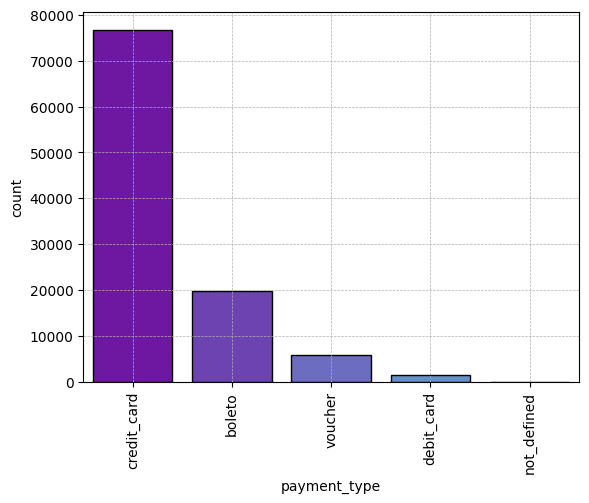

In [ ]:
#Tabla de order payments
sns.countplot(
    data = df_order_payments,
    x = 'payment_type',
    palette = palette,
    edgecolor = 'black'
)
plt.xticks(rotation = 90)
plt.grid(ls = '--', lw = 0.5)
plt.show()

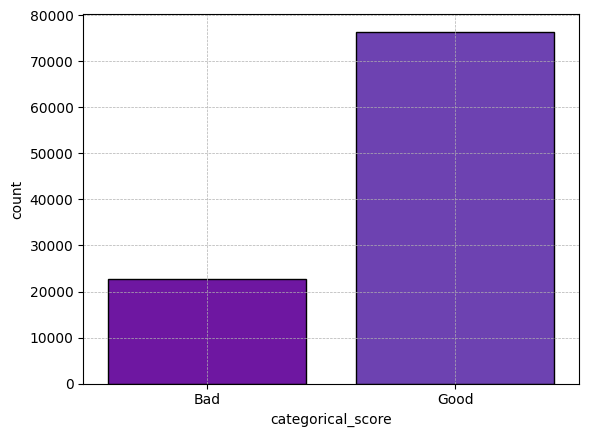

In [ ]:
#Tabla de reviews
df_translated_reviews['categorical_score'] = pd.cut(
    df_translated_reviews['review_score'],
    bins = [0, 3, 5],
    labels = ['Bad', 'Good']
)
sns.countplot(
    data = df_translated_reviews,
    x = 'categorical_score',
    palette = palette,
    edgecolor = 'black'
)
plt.grid(ls = '--', lw = 0.5)
plt.show()

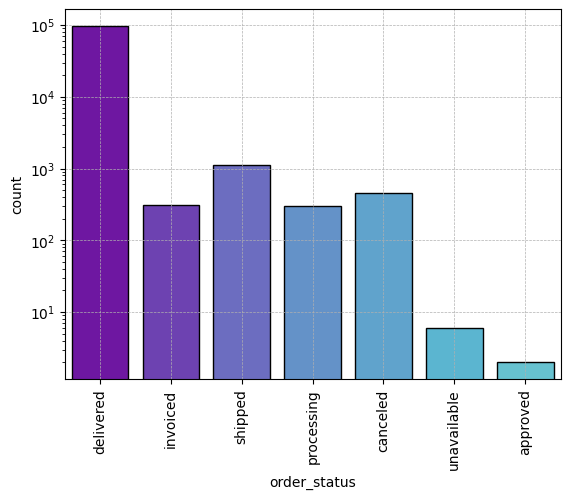

In [ ]:
#Tabla de orders
sns.countplot(
    data = df_orders,
    x = 'order_status',
    palette = palette,
    edgecolor = 'black'
)
plt.grid(ls = '--', lw = 0.5)
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

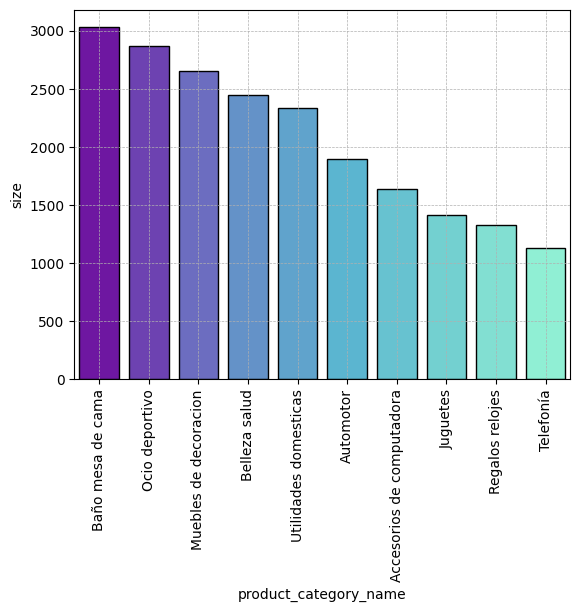

In [ ]:
# LAs 10 categorías con más compras
df_ = (
    df_products
    .groupby('product_category_name', as_index = False)
    .size()
    .nlargest(10, 'size')
    .reset_index(drop = True)
)
sns.barplot(
    data = df_,
    x = 'product_category_name',
    y = 'size',
    palette = palette,
    edgecolor = 'black'
)
plt.grid(ls = '--', lw = 0.5)
plt.xticks(rotation = 90)
plt.show()

### Análisis de variables numéricas

In [ ]:
#Tabla df_customer_geolocation_orders
columnas_numericas = df_customer_geolocation_orders.select_dtypes(include=['number']).columns
columnas_numericas

Index(['geolocation_lat', 'geolocation_lng'], dtype='object')

In [ ]:
#Tabla df_order_items
columnas_numericas1 = df_order_items.select_dtypes(include=['number']).columns
columnas_numericas1

Index(['order_item_id', 'price', 'freight_value'], dtype='object')

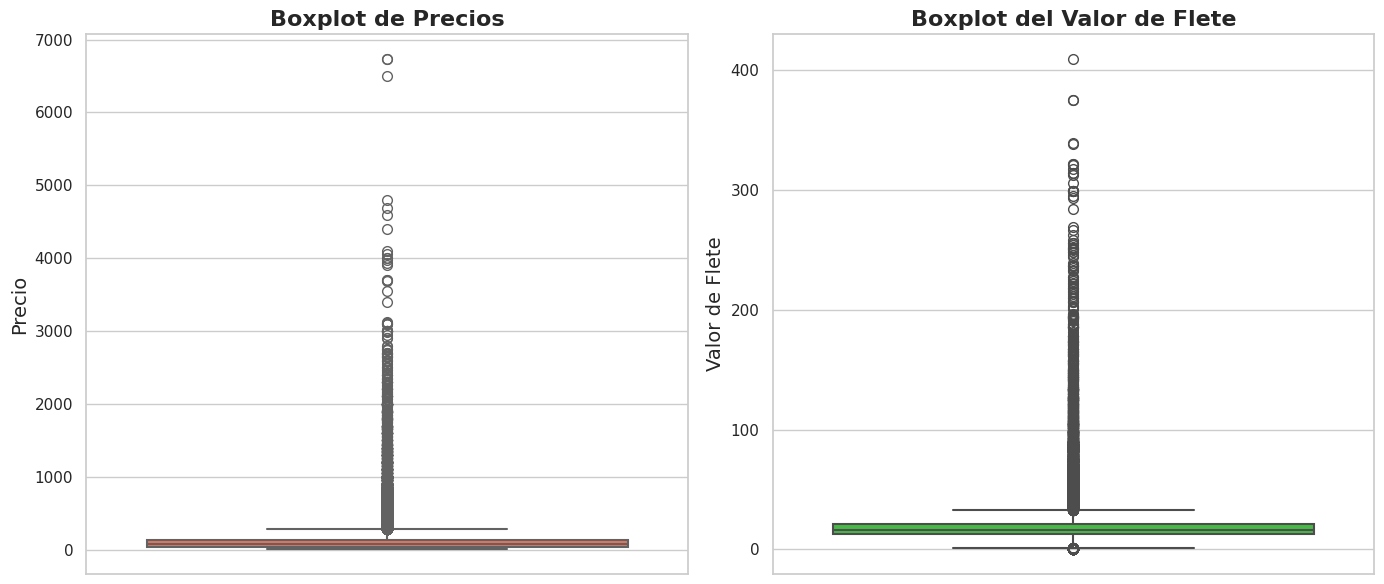

In [ ]:

sns.set(style="whitegrid")

# Crear una figura con dos subplots para los boxplots de 'price' y 'freight_value'
plt.figure(figsize=(14, 6))

# Boxplot de 'price'
plt.subplot(1, 2, 1)
sns.boxplot(y=df_order_items['price'], color='#FF6347', linewidth=1.5, fliersize=7)  # Color fluorescente (tomate)
plt.title('Boxplot de Precios', fontsize=16, fontweight='bold')
plt.ylabel('Precio', fontsize=14)
plt.xlabel('')  # Dejar el xlabel vacío porque es un boxplot vertical

# Boxplot de 'freight_value'
plt.subplot(1, 2, 2)
sns.boxplot(y=df_order_items['freight_value'], color='#32CD32', linewidth=1.5, fliersize=7)  # Color fluorescente (lime verde)
plt.title('Boxplot del Valor de Flete', fontsize=16, fontweight='bold')
plt.ylabel('Valor de Flete', fontsize=14)
plt.xlabel('')  # Dejar el xlabel vacío porque es un boxplot vertical

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()

Podemos observar en los boxplots de precios y de freight value la presencia de varios valores atípicos que exceden el rango intercuartílico (IQR). El valor máximo registrado para el precio es de 6735 BRL, mientras que para los fletes es de 409 BRL.

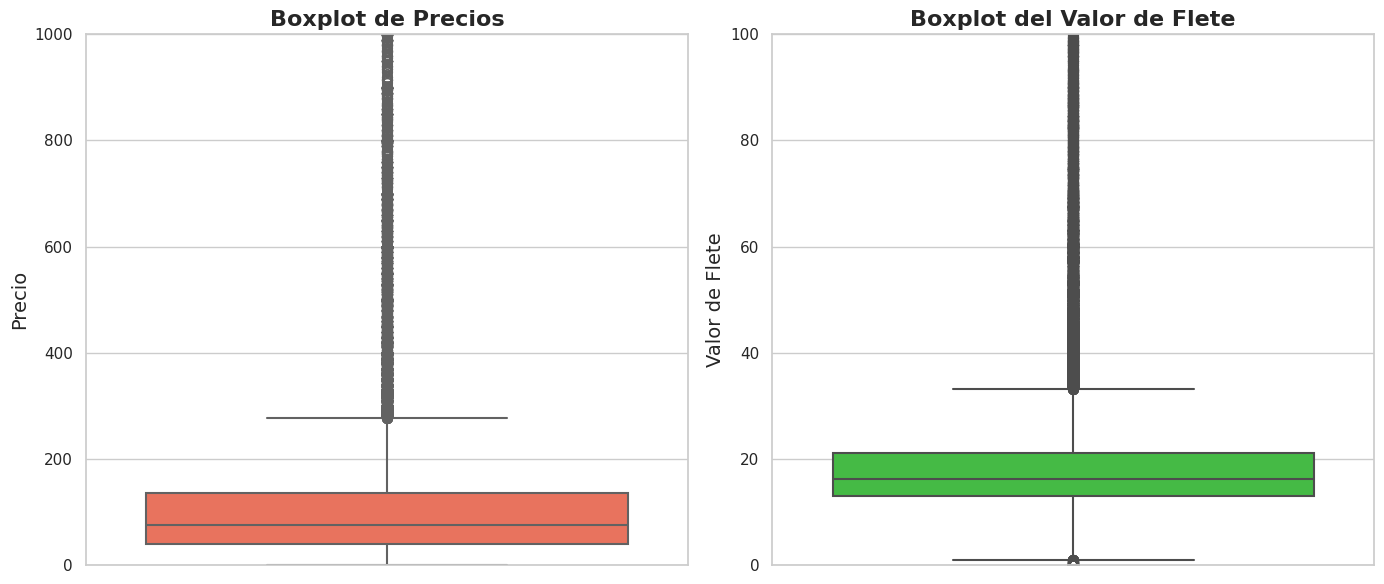

In [ ]:

sns.set(style="whitegrid")

# Crear una figura con dos subplots para los boxplots de 'price' y 'freight_value'
plt.figure(figsize=(14, 6))

# Boxplot de 'price' con rango ajustado
plt.subplot(1, 2, 1)
sns.boxplot(y=df_order_items['price'], color='#FF6347', linewidth=1.5, fliersize=7)  # Color fluorescente (tomate)
plt.title('Boxplot de Precios', fontsize=16, fontweight='bold')
plt.ylabel('Precio', fontsize=14)
plt.xlabel('')  # Dejar el xlabel vacío porque es un boxplot vertical
plt.ylim(0, 1000)  # Ajustar el rango del eje y

# Boxplot de 'freight_value' con rango ajustado
plt.subplot(1, 2, 2)
sns.boxplot(y=df_order_items['freight_value'], color='#32CD32', linewidth=1.5, fliersize=7)  # Color fluorescente (lime verde)
plt.title('Boxplot del Valor de Flete', fontsize=16, fontweight='bold')
plt.ylabel('Valor de Flete', fontsize=14)
plt.xlabel('')  # Dejar el xlabel vacío porque es un boxplot vertical
plt.ylim(0, 100)  # Ajustar el rango del eje y

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

# Supongamos que df_order_items es tu DataFrame con las columnas 'price' y 'freight_value'

# Calcular la media
mean_price = df_order_items['price'].mean()
mean_freight_value = df_order_items['freight_value'].mean()

# Calcular la mediana
median_price = df_order_items['price'].median()
median_freight_value = df_order_items['freight_value'].median()

# Calcular la moda
mode_price = df_order_items['price'].mode()[0]  # mode() devuelve una serie, seleccionamos el primer valor
mode_freight_value = df_order_items['freight_value'].mode()[0]

# Imprimir los resultados
print(f"Media de 'price': {mean_price}")
print(f"Mediana de 'price': {median_price}")
print(f"Moda de 'price': {mode_price}\n")

print(f"Media de 'freight_value': {mean_freight_value}")
print(f"Mediana de 'freight_value': {median_freight_value}")
print(f"Moda de 'freight_value': {mode_freight_value}")


Media de 'price': 120.65373901464716
Mediana de 'price': 74.99
Moda de 'price': 59.9

Media de 'freight_value': 19.990319928983578
Mediana de 'freight_value': 16.26
Moda de 'freight_value': 15.1


Al hacer un acercamiento a los dos gráficos anteriores, podemos analizar con mayor detalle estas dos variables.

En la variable "precio", observamos que un valor se considera atípico cuando el precio del producto supera los 280 BRL. La mediana de los valores se encuentra entre 39 y 134, con un promedio de 120.

Por otro lado, en la variable "coste del flete", notamos que la media es de 19,99 BRL, y que la mitad de los valores se sitúan entre 13 y 21.

In [ ]:
#Tabla df_order_payments
columnas_numericas2 = df_order_payments.select_dtypes(include=['number']).columns
columnas_numericas2

Index(['payment_sequential', 'payment_installments', 'payment_value'], dtype='object')

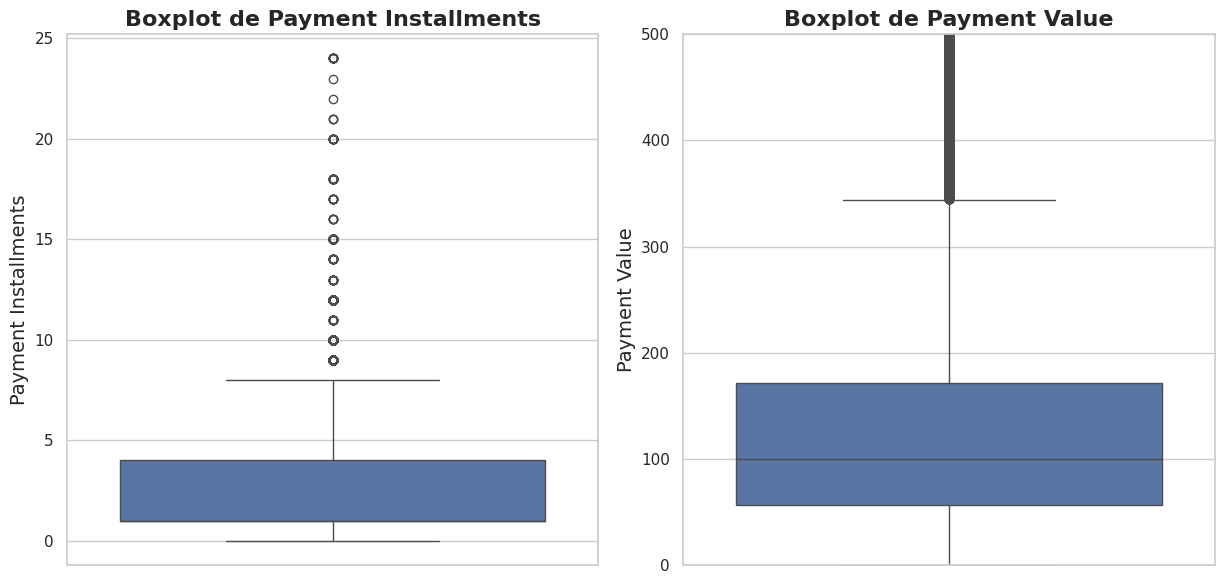

In [ ]:
# Estilo de seaborn para gráficos más bonitos
sns.set(style="whitegrid")

# Crear una figura con tres subplots para los boxplots de 'payment_sequential', 'payment_installments' y 'payment_value'
plt.figure(figsize=(18, 6))


# Boxplot de 'payment_installments'
plt.subplot(1, 3, 2)
sns.boxplot(y=df_order_payments['payment_installments'])
plt.title('Boxplot de Payment Installments', fontsize=16, fontweight='bold')
plt.ylabel('Payment Installments', fontsize=14)
plt.xlabel('')  # Dejar el xlabel vacío porque es un boxplot vertical

# Boxplot de 'payment_value' con rango ajustado
plt.subplot(1, 3, 3)
sns.boxplot(y=df_order_payments['payment_value'])
plt.title('Boxplot de Payment Value', fontsize=16, fontweight='bold')
plt.ylabel('Payment Value', fontsize=14)
plt.xlabel('')  # Dejar el xlabel vacío porque es un boxplot vertical
plt.ylim(0, 500)  # Ajustar el rango del eje y

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()

Junto con las estadísticas descriptivas iniciales y los boxplots analizados, obtenemos la siguiente información:

En el primer boxplot, correspondiente a los plazos de pago (payment installments), que refleja el número de cuotas en las que los clientes pueden abonar el producto, observamos que la media se sitúa en 2,85 plazos. La mitad de los clientes elige entre 1 y 4 plazos por pedido. El valor mínimo, como es evidente, es 1 plazo, mientras que el valor máximo es 24, lo que explica la presencia de valores atípicos en el boxplot.

En el segundo gráfico, que representa el valor del pago (payment value), se observa que la media de todos los pagos es de 154,10 Reales Brasileños, con una desviación estándar de 217,49. La mitad de los valores oscila entre 56 y 171, mientras que el valor máximo registrado es 13.664,08 BRL, lo que lo convierte en un outlier significativo.

In [ ]:
# Calcular la cantidad total de transacciones por tipo de payment_type
df_grouped = df_order_payments.groupby('payment_type').size().reset_index(name='cantidad_transacciones')

# Calcular el porcentaje dentro del total
df_grouped['porcentaje'] = (df_grouped['cantidad_transacciones'] / df_grouped['cantidad_transacciones'].sum()) * 100

df_grouped

,payment_type,cantidad_transacciones,porcentaje
0,boleto,19784,19.043952
1,credit_card,76795,73.922376
2,debit_card,1529,1.471806
3,not_defined,3,0.002888
4,voucher,5775,5.558978


In [ ]:
#Tabla df_translated_reviews
columnas_numericas3 = df_translated_reviews.select_dtypes(include=['number']).columns
columnas_numericas3

Index(['review_score'], dtype='object')

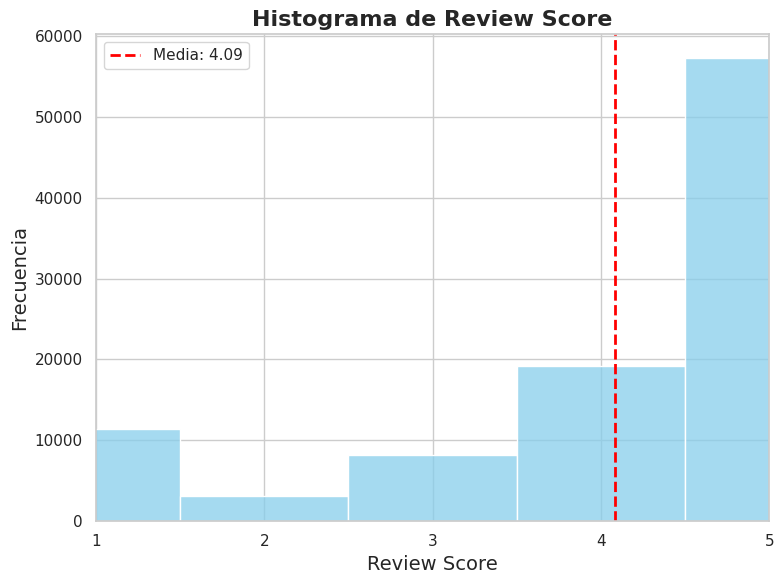

In [ ]:

# Calcular la media de 'review_score'
mean_review_score = df_translated_reviews['review_score'].mean()

# Crear una figura para el histograma de 'review_score'
plt.figure(figsize=(8, 6))

# Histograma de 'review_score' con bins ajustados y limitando el rango del eje x
sns.histplot(df_translated_reviews['review_score'], bins=np.arange(0.5, 5.6, 1), kde=False, color='skyblue')
plt.title('Histograma de Review Score', fontsize=16, fontweight='bold')
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Ajustar los límites del eje x para que se enfoquen solo en el rango del 1 al 5
plt.xlim(1, 5)

# Ajustar los ticks del eje x para mostrar solo enteros del 1 al 5
plt.xticks(ticks=np.arange(1, 6, 1))

# Añadir una línea vertical para la media
plt.axvline(mean_review_score, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_review_score:.2f}')

# Añadir una leyenda
plt.legend()

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()

En este gráfico se muestra la frecuencia de las puntuaciones otorgadas en las reseñas de nuestro dataframe *translated_reviews*. La media de las calificaciones es de 4,09, con un rango que va de 1 a 5. La mitad de las reseñas se sitúan entre 4 y 5. En total, se registran cerca de 100.000 reseñas, y el gráfico revela que la puntuación más frecuente es 5, con casi 60.000 apariciones, mientras que la puntuación menos común es 2.

In [ ]:
#Tabla df_orders
columnas_numericas4 = df_orders.select_dtypes(include=['number']).columns
columnas_numericas4

Index([], dtype='object')

Esta tabla no tiene variables numéricas.

In [ ]:
#Tabla df_products
columnas_numericas5 = df_products.select_dtypes(include=['number']).columns
columnas_numericas5

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

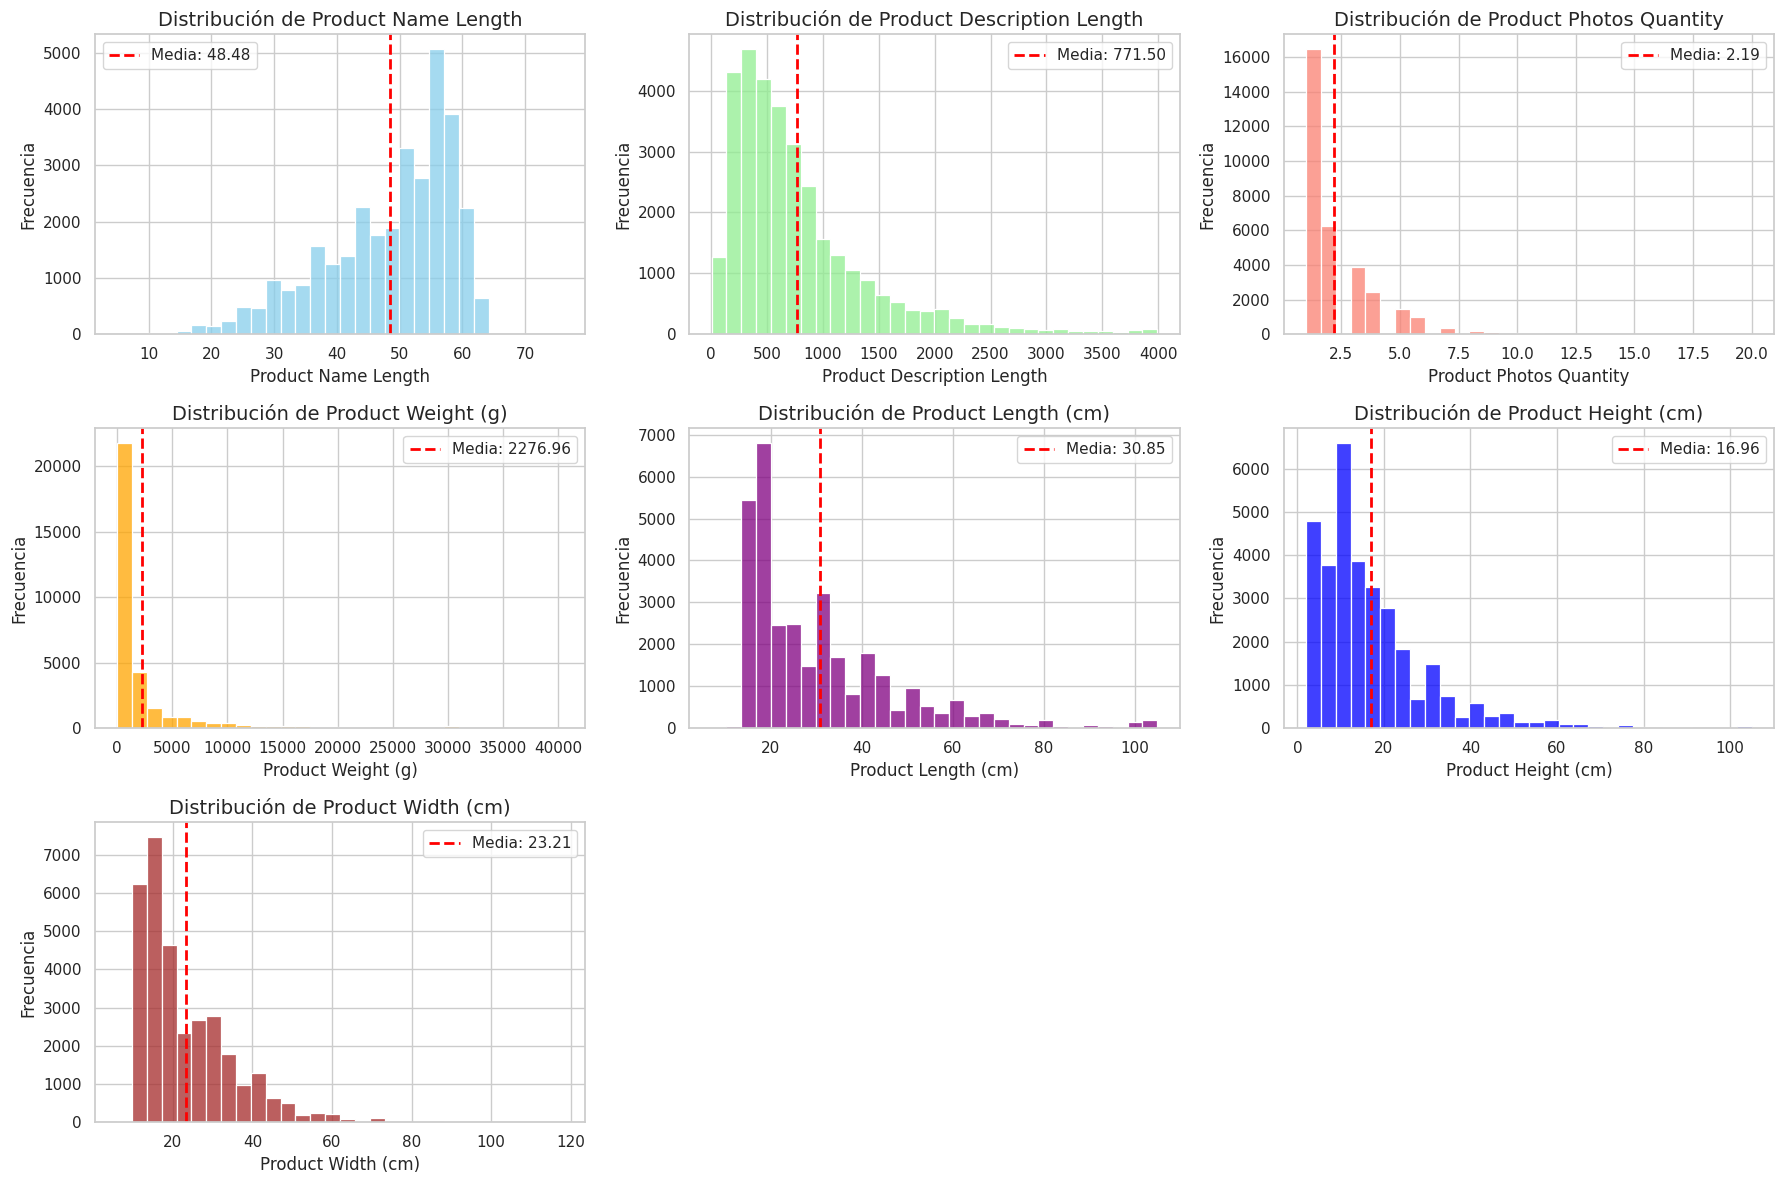

In [ ]:

# Crear una figura con subplots para los histogramas
plt.figure(figsize=(18, 12))

# Histograma de 'product_name_lenght'
plt.subplot(3, 3, 1)
sns.histplot(df_products['product_name_lenght'], bins=30, color='skyblue')
mean_name_length = df_products['product_name_lenght'].mean()
plt.axvline(mean_name_length, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_name_length:.2f}')
plt.title('Distribución de Product Name Length', fontsize=14)
plt.xlabel('Product Name Length', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()

# Histograma de 'product_description_lenght'
plt.subplot(3, 3, 2)
sns.histplot(df_products['product_description_lenght'], bins=30, color='lightgreen')
mean_description_length = df_products['product_description_lenght'].mean()
plt.axvline(mean_description_length, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_description_length:.2f}')
plt.title('Distribución de Product Description Length', fontsize=14)
plt.xlabel('Product Description Length', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()

# Histograma de 'product_photos_qty'
plt.subplot(3, 3, 3)
sns.histplot(df_products['product_photos_qty'], bins=30, color='salmon')
mean_photos_qty = df_products['product_photos_qty'].mean()
plt.axvline(mean_photos_qty, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_photos_qty:.2f}')
plt.title('Distribución de Product Photos Quantity', fontsize=14)
plt.xlabel('Product Photos Quantity', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()

# Histograma de 'product_weight_g'
plt.subplot(3, 3, 4)
sns.histplot(df_products['product_weight_g'], bins=30, color='orange')
mean_weight = df_products['product_weight_g'].mean()
plt.axvline(mean_weight, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_weight:.2f}')
plt.title('Distribución de Product Weight (g)', fontsize=14)
plt.xlabel('Product Weight (g)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()

# Histograma de 'product_length_cm'
plt.subplot(3, 3, 5)
sns.histplot(df_products['product_length_cm'], bins=30, color='purple')
mean_length = df_products['product_length_cm'].mean()
plt.axvline(mean_length, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_length:.2f}')
plt.title('Distribución de Product Length (cm)', fontsize=14)
plt.xlabel('Product Length (cm)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()

# Histograma de 'product_height_cm'
plt.subplot(3, 3, 6)
sns.histplot(df_products['product_height_cm'], bins=30, color='blue')
mean_height = df_products['product_height_cm'].mean()
plt.axvline(mean_height, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_height:.2f}')
plt.title('Distribución de Product Height (cm)', fontsize=14)
plt.xlabel('Product Height (cm)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()

# Histograma de 'product_width_cm'
plt.subplot(3, 3, 7)
sns.histplot(df_products['product_width_cm'], bins=30, color='brown')
mean_width = df_products['product_width_cm'].mean()
plt.axvline(mean_width, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_width:.2f}')
plt.title('Distribución de Product Width (cm)', fontsize=14)
plt.xlabel('Product Width (cm)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()

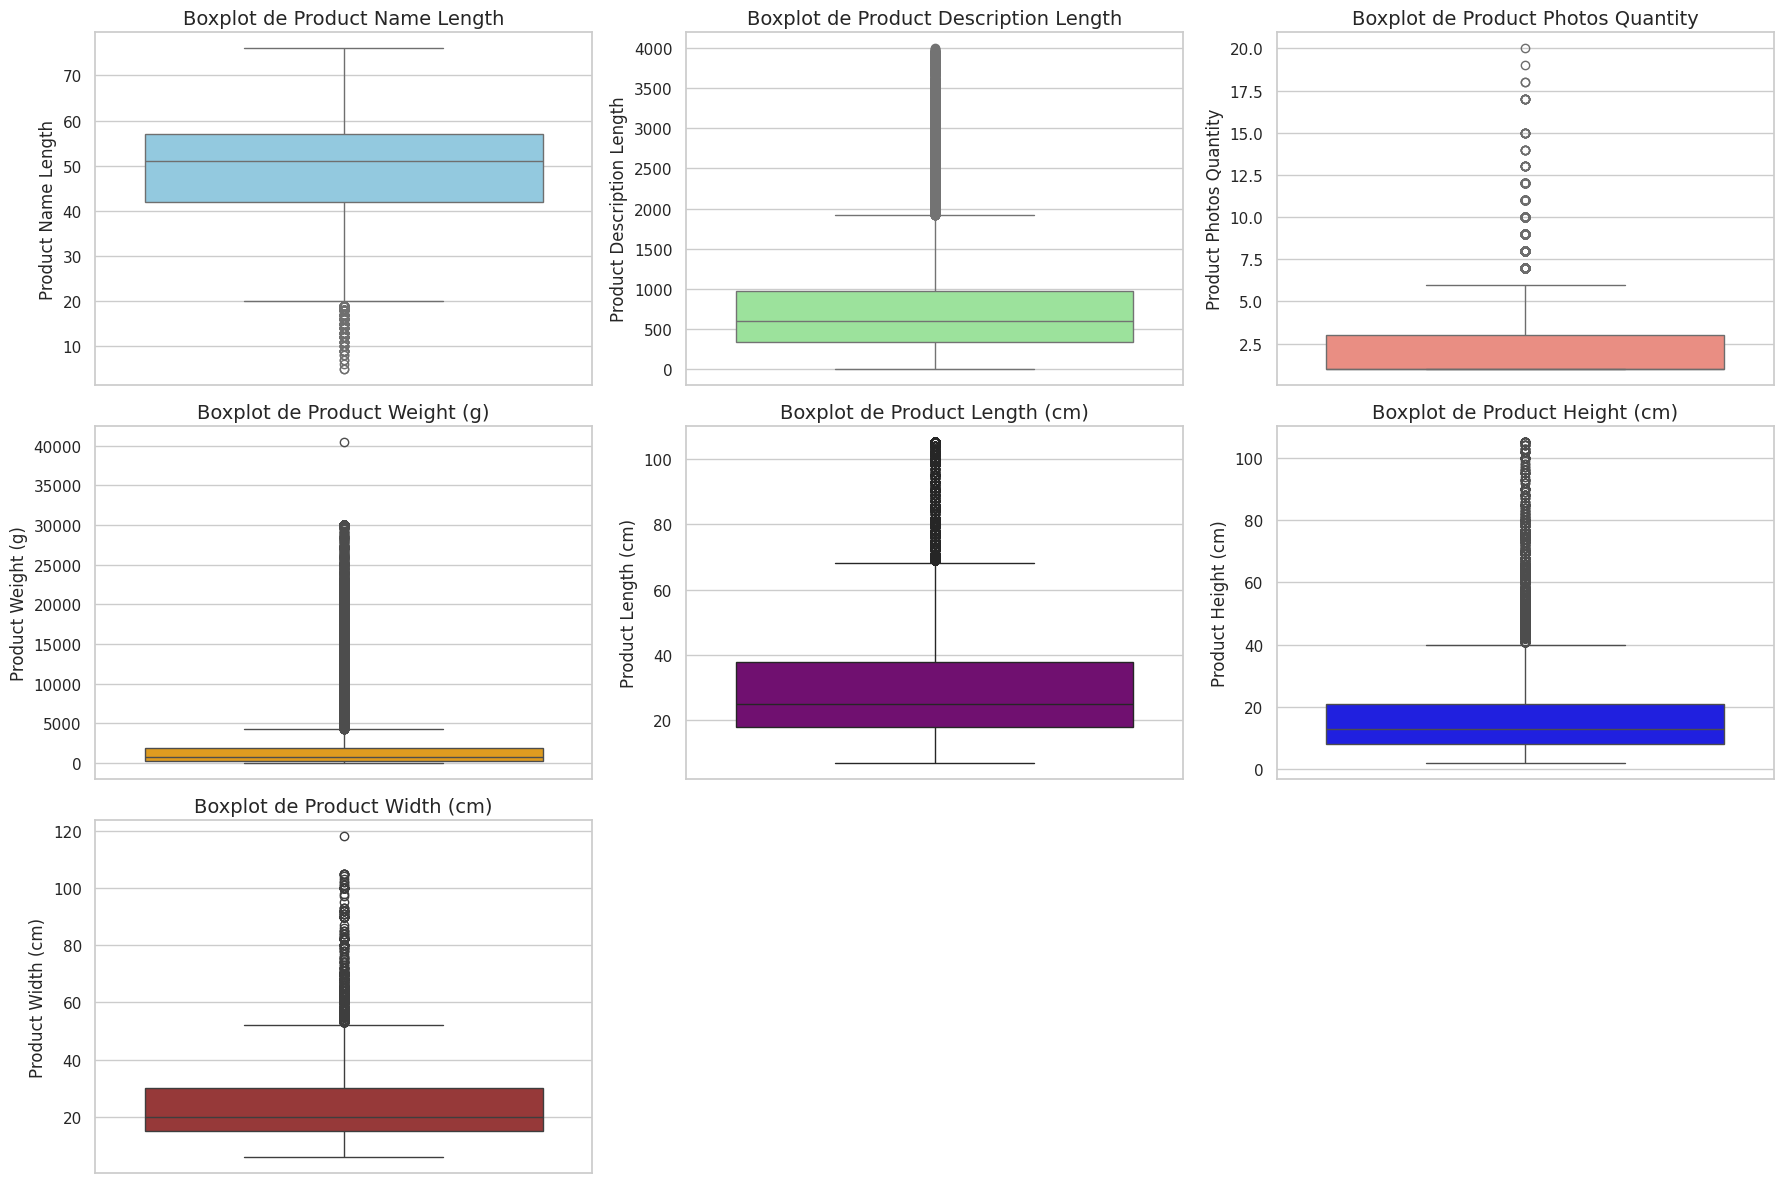

In [ ]:
# Crear una figura con subplots para los boxplots
plt.figure(figsize=(18, 12))

# Boxplot de 'product_name_lenght'
plt.subplot(3, 3, 1)
sns.boxplot(y=df_products['product_name_lenght'], color='skyblue')
plt.title('Boxplot de Product Name Length', fontsize=14)
plt.ylabel('Product Name Length', fontsize=12)

# Boxplot de 'product_description_lenght'
plt.subplot(3, 3, 2)
sns.boxplot(y=df_products['product_description_lenght'], color='lightgreen')
plt.title('Boxplot de Product Description Length', fontsize=14)
plt.ylabel('Product Description Length', fontsize=12)

# Boxplot de 'product_photos_qty'
plt.subplot(3, 3, 3)
sns.boxplot(y=df_products['product_photos_qty'], color='salmon')
plt.title('Boxplot de Product Photos Quantity', fontsize=14)
plt.ylabel('Product Photos Quantity', fontsize=12)

# Boxplot de 'product_weight_g'
plt.subplot(3, 3, 4)
sns.boxplot(y=df_products['product_weight_g'], color='orange')
plt.title('Boxplot de Product Weight (g)', fontsize=14)
plt.ylabel('Product Weight (g)', fontsize=12)

# Boxplot de 'product_length_cm'
plt.subplot(3, 3, 5)
sns.boxplot(y=df_products['product_length_cm'], color='purple')
plt.title('Boxplot de Product Length (cm)', fontsize=14)
plt.ylabel('Product Length (cm)', fontsize=12)

# Boxplot de 'product_height_cm'
plt.subplot(3, 3, 6)
sns.boxplot(y=df_products['product_height_cm'], color='blue')
plt.title('Boxplot de Product Height (cm)', fontsize=14)
plt.ylabel('Product Height (cm)', fontsize=12)

# Boxplot de 'product_width_cm'
plt.subplot(3, 3, 7)
sns.boxplot(y=df_products['product_width_cm'], color='brown')
plt.title('Boxplot de Product Width (cm)', fontsize=14)
plt.ylabel('Product Width (cm)', fontsize=12)

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()

1- Distribución del Largo del Nombre de los Productos: El primer gráfico ilustra la distribución del número de caracteres en los nombres de los productos. La media de caracteres es de 48,5, y los valores más frecuentes se encuentran entre 50 y 60 caracteres.

2- Distribución del Largo de la Descripción de los Productos: El segundo gráfico muestra la distribución del número de caracteres en las descripciones de los productos. La media es de 772 caracteres por descripción. La mayoría de las descripciones tienen entre 0 y 1000 caracteres, aunque existen algunos outliers con más de 4000 caracteres. Se observa que, a partir de los 1000 caracteres, la frecuencia de productos disminuye significativamente.

3- Distribución de la Cantidad de Fotos por Producto: El tercer gráfico representa la cantidad de fotografías asignadas a cada producto. La media es de 2,19 fotos por producto, siendo la moda 1 fotografía. La mitad de los productos tienen entre 1 y 3 fotos, con un outlier máximo de 20 fotos.

4- Distribución del Peso de los Productos (en gramos): El cuarto gráfico detalla la distribución del peso de los productos en gramos. La media es de 2.276,96 gramos. El rango intercuartílico muestra que los pesos varían entre 300 y 1.900 gramos. El valor máximo registrado es de 40.425 gramos (40,43 kg).

5- Distribución de la Largura de los Productos (en centímetros): El quinto gráfico presenta la distribución de la longitud de los productos. La media es de 30,85 cm, con un mínimo de 7 cm y un máximo de 105 cm. La mitad de los productos tienen una longitud entre 18 y 38 cm.

6- Distribución de la Altura de los Productos (en centímetros): El sexto gráfico ilustra la distribución de la altura de los productos. La media es de 16,96 cm. El valor máximo es de 105 cm y el mínimo de 2 cm. La mitad de los productos tienen una altura entre 8 y 21 cm.

7- Distribución de la Anchura de los Productos (en centímetros): El séptimo gráfico muestra la distribución de la anchura de los productos. La media es de 23,21 cm, con un valor máximo de 118 cm y un mínimo de 6 cm. La mitad de los productos tienen una anchura entre 15 y 30 cm.

In [ ]:
#Tabla df_sellers
columnas_numericas6 = df_sellers.select_dtypes(include=['number']).columns
columnas_numericas6

Index([], dtype='object')

Esta tabla no tiene variables numéricas.

In [ ]:
#Tabla df_product_category_name_translation
columnas_numericas7 = df_product_category_name_translation.select_dtypes(include=['number']).columns
columnas_numericas7

Index([], dtype='object')

Esta tabla no tiene variables numéricas.

# INSIGHTS ANÁLISIS UNIVARIABLE: VARIABLES NUMÉRICAS

### 1- Precios y Coste del Flete:

Precios: Existen valores atípicos significativos, con un precio máximo de 6735 BRL, mientras que un precio se considera atípico si supera los 280. La mediana de los precios está entre 39 y 134, con un promedio de 120.
Coste del Flete: La media del coste del flete es de 19,99, y la mitad de los valores se sitúan entre 13 y 21. El valor máximo registrado es 409, indicando la presencia de algunos valores atípicos elevados.

### 2- Plazos de Pago:

La media de los plazos de pago es de 2,85 cuotas, y la mayoría de los clientes elige entre 1 y 4 plazos por pedido. Los plazos van desde un mínimo de 1 hasta un máximo de 24, con algunos valores atípicos en el extremo superior.

### 3- Valor de los Pagos:

La media del valor de los pagos es 154,10 BRL, con una desviación estándar notable de 217,49. La mayoría de los pagos están entre 56 y 171, mientras que un valor máximo de 13.664,08 Reales Brasileños representa un outlier significativo.

### 4- Puntuaciones de las Reseñas:

La media de las puntuaciones es 4,09, con la mayoría de las reseñas en el rango de 4 a 5. La puntuación más frecuente es 5, con cerca de 60.000 apariciones, y la puntuación menos común es 2.

### 5- Largo del Nombre de los Productos:

Los nombres de los productos tienen una media de 48,5 caracteres. Los valores más comunes oscilan entre 50 y 60 caracteres, indicando que la mayoría de los nombres se encuentran en este rango.

### 6- Largo de la Descripción de los Productos:

La media de caracteres en las descripciones es 772, con la mayoría de las descripciones entre 0 y 1000 caracteres. La frecuencia de productos con descripciones más largas disminuye significativamente a partir de los 1000 caracteres, y hay algunos outliers con más de 4000 caracteres.

### 7- Cantidad de Fotos por Producto:

La media de fotos por producto es 2,19, siendo 1 foto la más frecuente. La mitad de los productos tienen entre 1 y 3 fotos, con un valor máximo atípico de 20 fotos.

### 8- Peso de los Productos:

El peso promedio de los productos es 2.276,96 gramos. El rango intercuartílico muestra que los pesos varían entre 300 y 1.900 gramos. El valor máximo registrado es 40.425 gramos, indicando un peso considerablemente alto para algunos productos.

### 9- Largura de los Productos:

La longitud media de los productos es 30,85 cm, con un mínimo de 7 cm y un máximo de 105 cm. La mitad de los productos tienen una longitud entre 18 y 38 cm.

### 10- Altura de los Productos:

La altura promedio es 16,96 cm. Los valores varían de un mínimo de 2 cm a un máximo de 105 cm, con la mayoría de los productos teniendo una altura entre 8 y 21 cm.

### 11- Anchura de los Productos:

La media de la anchura es 23,21 cm, con un mínimo de 6 cm y un máximo de 118 cm. La mitad de los productos tienen una anchura entre 15 y 30 cm.

# ANÁLISIS BIVARIABLE Y MULTIVARIANTES (CORRELACIONES)

VARIABLES NUMÉRICAS VS NUMÉRICAS


### 1. Relación entre Precio y Valor del Envío
-Hipótesis: "El valor del envío aumenta a medida que el precio del producto aumenta."

•	Razonamiento: Los productos más caros podrían tener un mayor valor de envío debido a su peso, tamaño o la necesidad de un servicio de envío más especializado. Podría revelar si productos más caros tienden a tener costos de envío más altos.


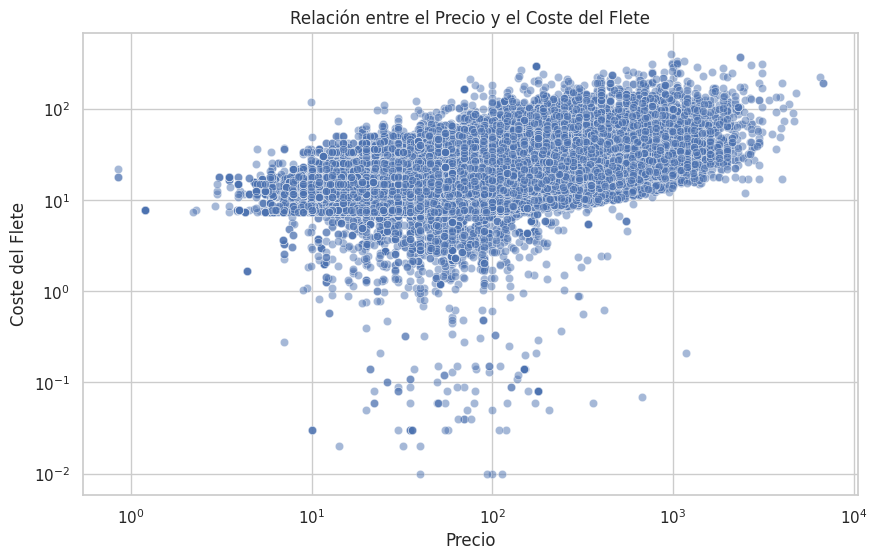

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_order_items, x='price', y='freight_value', alpha=0.5)

plt.title('Relación entre el Precio y el Coste del Flete')
plt.xlabel('Precio')
plt.ylabel('Coste del Flete')
plt.xscale('log')  # Opcional: aplicar escala logarítmica si hay valores extremos
plt.yscale('log')  # Opcional: aplicar escala logarítmica si hay valores extremos
plt.grid(True)
plt.show()

In [ ]:
# Calculando la correlación de Pearson
correlation = df_order_items[['price', 'freight_value']].corr().iloc[0, 1]
print(f'Coeficiente de correlación entre Price y Freight Value: {correlation:.2f}')

Coeficiente de correlación entre Price y Freight Value: 0.41


Un coeficiente de correlación de 0.41 entre price (precio) y freight_value (coste del flete) indica una correlación positiva moderada entre estas dos variables.

-Valor Positivo: El coeficiente positivo (0.41) sugiere que, en general, a medida que el precio de un producto aumenta, también tiende a aumentar el coste del flete. Es decir, hay una tendencia en la que productos más caros tienden a tener un coste de flete más alto.

-Correlación Moderada: Un coeficiente de 0.41 está en el rango de correlación moderada. Esto significa que, aunque existe una relación positiva entre el precio y el coste del flete, esta no es perfecta ni extremadamente fuerte. Hay una asociación, pero también hay variabilidad en los datos que no está explicada por esta relación.

# 2. Relación entre Peso del Producto y Valor del Envío

-Hipótesis: "El valor del envío está positivamente correlacionado con el peso del producto."

-Razonamiento: Productos más pesados pueden costar más para ser enviados, ya que el costo del transporte suele aumentar con el peso.


In [ ]:
# Combinar los DataFrames en base al 'product_id'
df_order_items_products = pd.merge(df_order_items, df_products, on='product_id', how='inner')

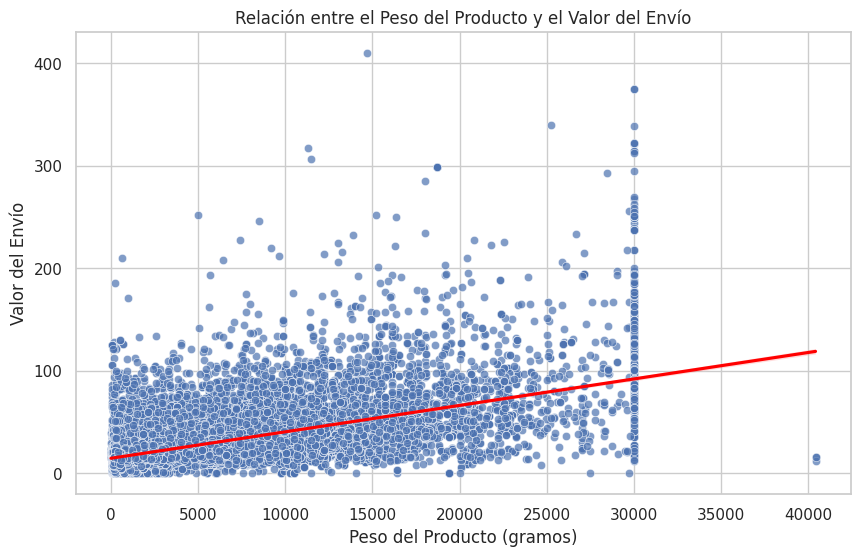

In [ ]:

plt.figure(figsize=(10, 6))

# Crear el scatterplot
sns.scatterplot(data=df_order_items_products, x='product_weight_g', y='freight_value', alpha=0.7)

# Añadir una línea de regresión para mostrar la correlación
sns.regplot(data=df_order_items_products, x='product_weight_g', y='freight_value', scatter=False, color='red')

plt.title('Relación entre el Peso del Producto y el Valor del Envío')
plt.xlabel('Peso del Producto (gramos)')
plt.ylabel('Valor del Envío')
plt.grid(True)
plt.show()

In [ ]:
correlation = df_order_items_products[['product_weight_g', 'freight_value']].corr().iloc[0, 1]
print(f'Coeficiente de correlación entre Peso del Producto y Valor del Envío: {correlation:.2f}')

Coeficiente de correlación entre Peso del Producto y Valor del Envío: 0.61



Un coeficiente de correlación de 0.61 entre el product_weight_g (peso del producto) y el freight_value (valor del envío) indica una correlación positiva moderada a fuerte.

-Correlación Positiva Moderada a Fuerte: El coeficiente de 0.61 sugiere una relación positiva significativa entre el peso del producto y el valor del envío. Esto implica que, en general, a medida que el peso del producto aumenta, el coste del envío también tiende a aumentar.

-Relación General: Aunque el coeficiente indica una relación positiva, no es una correlación perfecta. Esto significa que, mientras hay una tendencia general de que un mayor peso esté asociado con un mayor coste de envío, la relación no es absoluta y hay variabilidad. Otros factores pueden influir en el valor del envío además del peso.

# 3. Relación entre Número de Fotos y Longitud de la Descripción del Producto

-Hipótesis: "Los productos con descripciones más largas tienden a tener un mayor número de fotos asociadas."

•	Razonamiento: Un producto con una descripción más detallada puede necesitar más fotos para proporcionar una vista completa del producto al cliente.


In [ ]:
# Calcular el coeficiente de correlación entre el número de fotos y la longitud de la descripción
correlation = df_products[['product_photos_qty', 'product_description_lenght']].corr().iloc[0, 1]

print(f"Coeficiente de correlación entre el número de fotos y la longitud de la descripción: {correlation:.2f}")

Coeficiente de correlación entre el número de fotos y la longitud de la descripción: 0.11


Un coeficiente de correlación de 0.11 entre el número de fotos y la longitud de la descripción sugiere una correlación positiva muy débil entre estas dos variables. Esto significa que, en general, no hay una relación fuerte o significativa entre la longitud de la descripción del producto y el número de fotos asociadas.

# 4. Relación entre Número de Cuotas y Valor del Pago

-Hipótesis: "Los clientes que optan por pagar en más cuotas tienden a realizar compras de mayor valor."

•	Razonamiento: Los clientes pueden elegir pagar en más cuotas para facilitar el pago de productos más caros, ya que los costos se distribuyen a lo largo del tiempo.


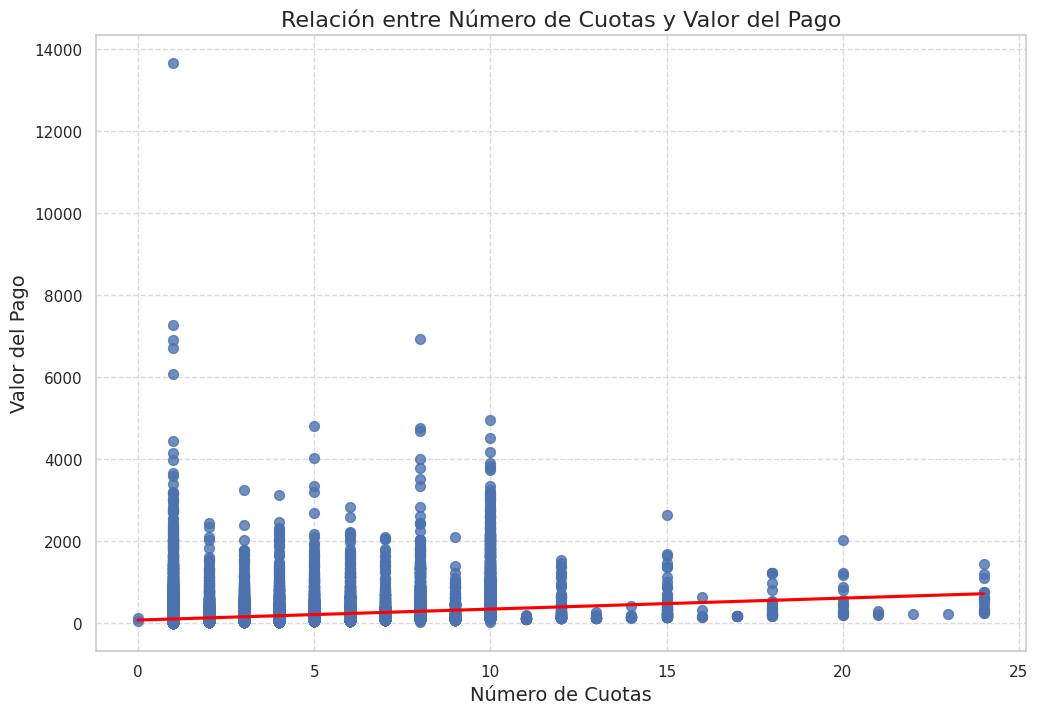

In [ ]:
plt.figure(figsize=(12, 8))

# Crear el scatter plot con una línea de regresión
sns.regplot(data=df_order_payments, x='payment_installments', y='payment_value', scatter_kws={'s':50}, line_kws={'color':'red'})

plt.title('Relación entre Número de Cuotas y Valor del Pago', fontsize=16)
plt.xlabel('Número de Cuotas', fontsize=14)
plt.ylabel('Valor del Pago', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [ ]:

# Calcular el coeficiente de correlación entre el número de cuotas y el valor del pago
correlation = df_order_payments[['payment_installments', 'payment_value']].corr().iloc[0, 1]

print(f"Coeficiente de correlación entre el número de cuotas y el valor del pago: {correlation:.2f}")

Coeficiente de correlación entre el número de cuotas y el valor del pago: 0.33


Un coeficiente de correlación de 0.33 entre el número de cuotas y el valor del pago sugiere una correlación positiva moderada. Esto implica que hay una tendencia general a que los pagos en más cuotas estén asociados con valores de pago más altos, aunque la relación no es extremadamente fuerte.

# 5. Relación entre cantidad de fotos y número de órdenes.

-Hipótesis: "Los productos con más fotos generan más ventas."

•	Razonamiento: Los clientes pueden tomar la decisión de comprar un producto, si tienen más imágenes del mismo.

In [ ]:
# 1. Unir los DataFrames

# Unir df_products con df_order_items en product_id
df_merged = pd.merge(df_order_items, df_products[['product_id', 'product_photos_qty']], on='product_id', how='inner')

# Unir con df_orders en order_id para obtener las órdenes
df_merged = pd.merge(df_merged, df_orders[['order_id']], on='order_id', how='inner')

# 2. Agrupar por la cantidad de fotos y contar las órdenes únicas por producto
order_counts = df_merged.groupby(['product_id', 'product_photos_qty'])['order_id'].nunique().reset_index(name='order_count')

# 3. Calcular el promedio de órdenes para cada cantidad de fotos
average_orders_by_photos = order_counts.groupby('product_photos_qty')['order_count'].mean().reset_index()

# Mostrar el resultado
print(average_orders_by_photos)

    product_photos_qty  order_count
0                    1     3.047911
1                    2     3.165256
2                    3     2.984974
3                    4     3.214580
4                    5     3.446765
5                    6     3.610537
6                    7     4.204082
7                    8     3.645833
8                    9     2.819048
9                   10     3.431579
10                  11     1.434783
11                  12     1.514286
12                  13     3.333333
13                  14     1.200000
14                  15     1.500000
15                  17     1.285714
16                  18     2.000000
17                  19     2.000000
18                  20     1.000000


In [ ]:
# Agrupar por producto y contar las órdenes únicas
order_counts = df_merged.groupby('product_id')['order_id'].nunique().reset_index(name='order_count')

# Unir el conteo de órdenes con el DataFrame original de productos
df_analysis = pd.merge(order_counts, df_products[['product_id', 'product_photos_qty']], on='product_id', how='inner')

# Calcular el coeficiente de correlación entre la cantidad de fotos y la cantidad de órdenes
correlation = df_analysis[['product_photos_qty', 'order_count']].corr().iloc[0, 1]

print(f"Coeficiente de correlación entre la cantidad de fotos y la cantidad de órdenes: {correlation:.2f}")


Coeficiente de correlación entre la cantidad de fotos y la cantidad de órdenes: 0.01


In [ ]:
# Calcular la media
media = df_products['product_photos_qty'].mean()

# Calcular la mediana
mediana = df_products['product_photos_qty'].median()

# Calcular la moda usando pandas
moda = df_products['product_photos_qty'].mode()

# Mostrar los resultados
print(f"Media de product_photos_qty: {media:.2f}")
print(f"Mediana de product_photos_qty: {mediana}")

# La moda puede tener múltiples valores, por lo que se maneja como una lista
if len(moda) > 0:
    print(f"Moda de product_photos_qty: {moda[0]}")  # Si hay más de una moda, tomamos la primera
else:
    print("No hay una moda definida")

Media de product_photos_qty: 2.19
Mediana de product_photos_qty: 1.0
Moda de product_photos_qty: 1


Un coeficiente de correlación de 0.01 entre el número de fotos y la longitud de la descripción sugiere una correlación casi inexistente entre estas dos variables. Esto significa que, en general, no hay una relación significativa entre la cantidad de fotos y las ventas, siendo el promedio de fotos de 2,19 por producto.



# VARIABLES CATEGÓRICAS VS CATEGÓRICAS

# 1. Relación entre Estado del Cliente y Estado del Pedido

-Hipótesis: "Los pedidos de clientes ubicados en ciertos estados tienen una mayor probabilidad de ser entregados tarde o ser cancelados."

•	Razonamiento: Las variaciones en la logística y los servicios de envío pueden afectar la puntualidad de las entregas en diferentes estados.


In [ ]:
df_geolocation = pd.read_parquet('/content//drive/MyDrive/e-commerce TFM/Data/df_geolocation_clean.parquet')

In [ ]:
# Paso 1: Crear la tabla de contingencia
crosstab = pd.crosstab(df_geolocation['geolocation_state'], df_orders['order_status'])

# Paso 2: Agregar una columna "Total" que sume todas las columnas (es decir, el total de pedidos por estado)
crosstab['Total'] = crosstab.sum(axis=1)

# Paso 3: Calcular la tasa de cancelación dividiendo la columna de cancelados por la columna "Total"
crosstab['Tasa_de_cancelacion'] = (crosstab['canceled'] / crosstab['Total']) * 100

# Paso 4: Ordenar la tabla por la columna "Tasa_de_cancelacion" de mayor a menor
crosstab_sorted = crosstab.sort_values(by='Tasa_de_cancelacion', ascending=False)

# Mostrar la tabla ordenada con la tasa de cancelación
print(crosstab_sorted[['canceled', 'Total', 'Tasa_de_cancelacion']])


order_status       canceled  Total  Tasa_de_cancelacion
geolocation_state                                      
RR                        1     28             3.571429
AC                        1     43             2.325581
RN                        4    276             1.449275
AM                        2    143             1.398601
TO                        2    181             1.104972
GO                        8    771             1.037613
MA                        3    310             0.967742
RO                        1    107             0.934579
PA                        2    309             0.647249
BA                        6    981             0.611621
MG                       11   1857             0.592353
DF                        3    511             0.587084
RS                        6   1122             0.534759
SC                        3    617             0.486224
SP                       21   6302             0.333228
ES                        1    313             0

In [ ]:
# Crear la tabla de contingencia
crosstab = pd.crosstab(df_geolocation['geolocation_state'], df_orders['order_status'])

# Mostrar la tabla
print(crosstab)

order_status       canceled  delivered  invoiced  processing  shipped
geolocation_state                                                    
AC                        1         40         0           0        2
AL                        0        175         0           0        3
AM                        2        138         1           0        2
AP                        0         25         0           0        0
BA                        6        960         5           1        9
CE                        0        535         0           2        7
DF                        3        498         2           0        8
ES                        1        311         1           0        0
GO                        8        753         2           2        6
MA                        3        304         2           1        0
MG                       11       1812         7           6       21
MS                        0        238         1           0        3
MT                  

1. Dominio de Pedidos Entregados (delivered):

En todos los estados, la mayoría de los pedidos han sido entregados. Esto es indicativo de un sistema logístico eficiente, donde la mayoría de los pedidos completan el ciclo de compra.
São Paulo (SP) destaca significativamente, con 6,168 pedidos entregados, seguido por Minas Gerais (MG) con 1,812 entregas, lo que sugiere que estos estados tienen una alta actividad de compras en línea.

2. Cancelaciones (canceled) Relativamente Bajas:

Las cancelaciones son bajas en comparación con las entregas en todos los estados. El número más alto de cancelaciones se encuentra en São Paulo (SP) con 21 pedidos cancelados, seguido por Minas Gerais (MG) con 11 cancelaciones. Esto podría ser un reflejo de la satisfacción del cliente o de un proceso de compra bien gestionado en estos estados.

3. Estados con Mayor Actividad Comercial:

São Paulo (SP) es, con diferencia, el estado con la mayor cantidad de transacciones en todas las categorías de estado de pedido, incluyendo 6,168 entregas, 21 cancelaciones, y otros estados como invoiced, processing y shipped también con cifras superiores a otros estados.
Minas Gerais (MG) y Rio de Janeiro (RJ) también muestran altos volúmenes de actividad, con más de 1,000 pedidos entregados cada uno.

4. Estados con Menor Actividad Comercial:

Roraima (RR), Amapá (AP), y Acre (AC) muestran la menor actividad en términos de cantidad de pedidos. Por ejemplo, Roraima (RR) solo tiene 26 pedidos entregados y 1 cancelado. Esto podría estar relacionado con factores como menor densidad poblacional, menores tasas de adopción de comercio electrónico, o desafíos logísticos en estas áreas.

5. Procesamiento y Envío (processing y shipped):

Los estados con valores más altos en estas categorías (por ejemplo, São Paulo (SP) con 22 en processing y 74 en shipped) podrían indicar un volumen más alto de pedidos en tránsito o en espera de ser completados. Sin embargo, estas cifras son pequeñas comparadas con la cantidad de pedidos entregados, lo que sugiere que la mayoría de los pedidos avanzan rápidamente hacia la entrega.

6. Invoiced (invoiced):

Los estados de São Paulo (SP) y Minas Gerais (MG) tienen una ligera cantidad de pedidos que han sido facturados pero no entregados, lo que podría reflejar pedidos en una etapa intermedia entre la compra y la entrega.

7. Estados con Valores Específicos de Interés:

Goiás (GO) muestra una cantidad relativamente alta de cancelaciones (8) en comparación con otros estados con volúmenes de pedidos similares, lo que podría merecer una revisión más detallada para identificar posibles problemas.

8. Tasa de cancelación:

Los Estados con mayor tasa de cancelación son: RR (Roraima) (3.571429), AC (Acre) (2.325581),RN (Rio Grande do Norte) (1.449275), AM (Amazonas) (1.398601), TO (Tocatints)(1.104972), GO (Goiás) (1.037613)   

# 2. Relación entre Estado del Pedido y Método de Pago
-Hipótesis: "Los pedidos pagados en efectivo tienen una mayor probabilidad de ser cancelados en comparación con los pedidos pagados con tarjeta de crédito."

•	Razonamiento: Los pagos en efectivo pueden estar asociados con mayores riesgos de cancelación o problemas en la entrega.


In [ ]:
# Crear la tabla crosstab
crosstab_payment_order_status = pd.crosstab(df_customer_geolocation_orders['order_status'], df_order_payments['payment_type'])

# Mostrar la tabla crosstab
print(crosstab_payment_order_status)


payment_type  boleto  credit_card  debit_card  not_defined  voucher
order_status                                                       
approved           0            2           0            0        0
canceled          84          347           3            0       27
delivered      18391        71297        1422            3     5365
invoiced          55          230           7            0       20
processing        53          229           7            0       12
shipped          187          853          14            0       52
unavailable        0            6           0            0        0


1. Proporción de Cancelaciones:

Pagos con boleto: De los 18,779 pedidos realizados con este método, 84 fueron cancelados. Esto representa aproximadamente un 0.45% de cancelaciones.
Pagos con tarjeta de crédito: Se registraron 71,297 pedidos, de los cuales 347 fueron cancelados, lo que representa un 0.49% de cancelaciones.
Pagos con voucher: De los 5,477 pedidos realizados con voucher, 27 fueron cancelados, lo que representa alrededor del 0.49% de cancelaciones.
Pagos con tarjeta de débito: De los 1,453 pedidos, solo 3 fueron cancelados, lo que representa aproximadamente un 0.21%.
Insight: La hipótesis de que los pagos en efectivo (boleto) tienen una mayor probabilidad de ser cancelados no se confirma con estos datos, ya que el porcentaje de cancelaciones es similar al de otros métodos como tarjetas de crédito y vouchers.

2. Tasa de Entrega:

Pagos con boleto: La mayoría de los pedidos (98%) realizados con boleto fueron entregados con éxito (18,391 de 18,779).
Pagos con tarjeta de crédito: El 99% de los pedidos fueron entregados (71,297 de 71,303).
Pagos con voucher: Un 98% de los pedidos se entregaron (5,365 de 5,477).
Pagos con tarjeta de débito: Un 98% de los pedidos se entregaron (1,422 de 1,453).
Insight: Todos los métodos de pago tienen tasas de entrega muy altas, lo que indica que independientemente del método de pago, los pedidos tienen una alta probabilidad de ser entregados.

3. Pedidos Procesados y Facturados:

Pagos con boleto: 55 pedidos fueron facturados y 53 están en proceso.
Pagos con tarjeta de crédito: 230 pedidos fueron facturados y 229 están en proceso.
Pagos con voucher: 20 pedidos fueron facturados y 12 están en proceso.
Insight: La proporción de pedidos en proceso o facturados es baja en comparación con los pedidos entregados, lo que sugiere que la mayoría de los pedidos avanzan rápidamente a la fase de entrega, independientemente del método de pago.

4. Pedidos No Disponibles:

Pagos con tarjeta de crédito: Se registraron 6 pedidos como "unavailable".
Insight: El estado "unavailable" es extremadamente raro y solo se presenta en un pequeño número de pedidos pagados con tarjeta de crédito. Esto podría indicar problemas específicos con este método que requieren más investigación.

# 3. Relación entre Estado del Cliente y Estado del Vendedor

-Hipótesis: Es más probable que las ventas ocurran dentro del mismo estado (es decir, el cliente y el vendedor se encuentran en el mismo estado).

-Razonamiento: Los clientes pueden preferir comprar productos de vendedores locales para reducir los tiempos de envío y costos adicionales.

seller_state    AC  AM  BA  CE  DF  ES  GO  MA   MG  MS  ...  PE  PI   PR  RJ  \
customer_state                                           ...                    
AC               0   0   0   0   0   0   0   0    0   0  ...   0   0    0   0   
AL               0   0   0   0   0   0   0   0    2   0  ...   0   0    1   0   
AM               0   0   1   0   0   0   0   0    1   0  ...   0   0    0   0   
AP               0   0   0   0   0   0   0   0    0   0  ...   0   0    0   1   
BA               0   0   0   1   0   0   1   0   10   0  ...   0   0   17  10   
CE               0   0   0   0   0   0   0   0    5   0  ...   0   0    1   3   
DF               0   0   0   1   0   1   2   0    7   0  ...   0   0   12   4   
ES               0   0   1   1   1   0   0   1    4   0  ...   0   0    8   2   
GO               0   0   0   0   0   1   0   0    9   0  ...   0   0   11   4   
MA               0   0   0   0   0   0   1   0    1   0  ...   0   0    1   1   
MG               0   0   1  

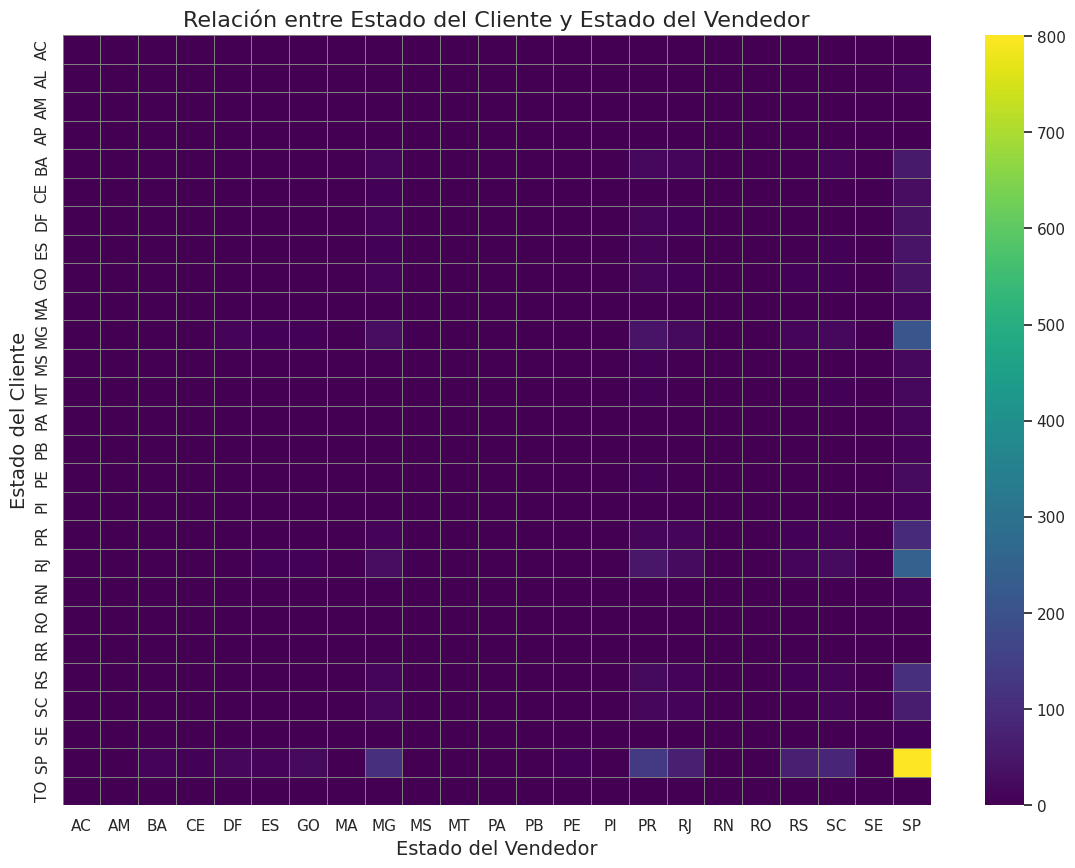

In [ ]:

# Generar crosstab
crosstab_state_customer_seller = pd.crosstab(df_customer_geolocation_orders['customer_state'], df_sellers['seller_state'])

# Visualizar la tabla
print(crosstab_state_customer_seller)

# Graficar el heatmap para visualizar la relación entre los estados del cliente y el vendedor
plt.figure(figsize=(14, 10))
sns.heatmap(
    crosstab_state_customer_seller,
    cmap='viridis',
    annot=False,
    fmt='d',
    linewidths=0.5,  # Ajustar el grosor de las líneas separadoras
    linecolor='gray'  # Color de las líneas separadoras
)
plt.title('Relación entre Estado del Cliente y Estado del Vendedor', fontsize=16)
plt.xlabel('Estado del Vendedor', fontsize=14)
plt.ylabel('Estado del Cliente', fontsize=14)
plt.show()


1. Tendencia Local de Compra

Estados con alta concentración de ventas: Los estados de São Paulo, Minas Gerais y Río de Janeiro muestran un alto número de transacciones tanto para compradores como para vendedores. Esto sugiere que estos estados tienen una actividad comercial significativa, con São Paulo destacándose como el estado con la mayor cantidad de transacciones.
Tendencia a comprar dentro del estado: Los estados como São Paulo y Minas Gerais no solo tienen un alto número de transacciones en total, sino que también tienen un número considerable de transacciones dentro del mismo estado. Esto indica que los clientes en estos estados prefieren comprar a vendedores locales.

2. Estados con Baja Actividad

Estados con muy pocas transacciones: Algunos estados como Acre, Amapá, Roraima y Rondônia tienen muy pocas transacciones en comparación con otros estados. Esto puede indicar una menor actividad comercial en estos estados o una falta de vendedores en esas regiones.

3. Desbalance en la Distribución

Transacciones desiguales: Algunos estados como São Paulo y Minas Gerais tienen un número significativamente mayor de transacciones en comparación con estados como Rondônia y Roraima, que tienen muy pocas. Esto puede reflejar desigualdades en la actividad económica o en la disponibilidad de productos.

4. Preferencias Regionales

Estado de mayor compra local: São Paulo y Río de Janeiro no solo tienen muchos compradores y vendedores, sino que también muestran un alto nivel de transacciones entre clientes y vendedores dentro del mismo estado. São Paulo, por ejemplo, tiene 801 transacciones de vendedores en el estado de São Paulo, y Río de Janeiro tiene 247.

5. Interacción Estado-Vendedor

Concentración de transacciones en ciertos estados: Los estados como Minas Gerais y São Paulo tienen un alto número de transacciones tanto de compradores como de vendedores, sugiriendo una red comercial densa y activa. Por otro lado, la Bahía muestra un alto número de transacciones desde vendedores pero menos hacia otros estados, indicando que podría ser un punto central para las ventas.

6. Otros Insights Específicos

El estado de Alagoas tiene solo 2 transacciones con vendedores en Minas Gerais, y ningún otro estado tiene transacciones destacadas. Esto puede indicar un mercado pequeño o emergente en Alagoas.
Estados con gran número de transacciones fuera de su región: Minas Gerais y São Paulo tienen transacciones significativas en otros estados, lo cual indica que los vendedores en estos estados pueden tener un alcance nacional.

# 4. Relación entre Categoría del Producto y Método de Pago

-Hipótesis: Ciertas categorías de productos, como los electrónicos o artículos de lujo, tienen una mayor probabilidad de ser pagados con tarjeta de crédito que con otros métodos de pago.

Razonamiento: Los productos de alto valor pueden estar más asociados con pagos a crédito debido a la facilidad de financiamiento.

payment_type               boleto  credit_card  debit_card  not_defined  \
product_category_name                                                     
Accesorios de computadora    1474         5464         101            0   
Accesorios para bolsos        205          755          14            0   
Agroindustria y comercio       40          139           2            0   
Aire acondicionado             50          201           2            0   
Alimento                       74          379           6            0   
...                           ...          ...         ...          ...   
Suministros de fiesta           8           28           0            0   
Telefonía                     821         3244          55            0   
Telefonía fija                 50          156           2            0   
Tienda de mascotas            341         1296          29            0   
Utilidades domesticas        1177         4748          99            0   

payment_type            

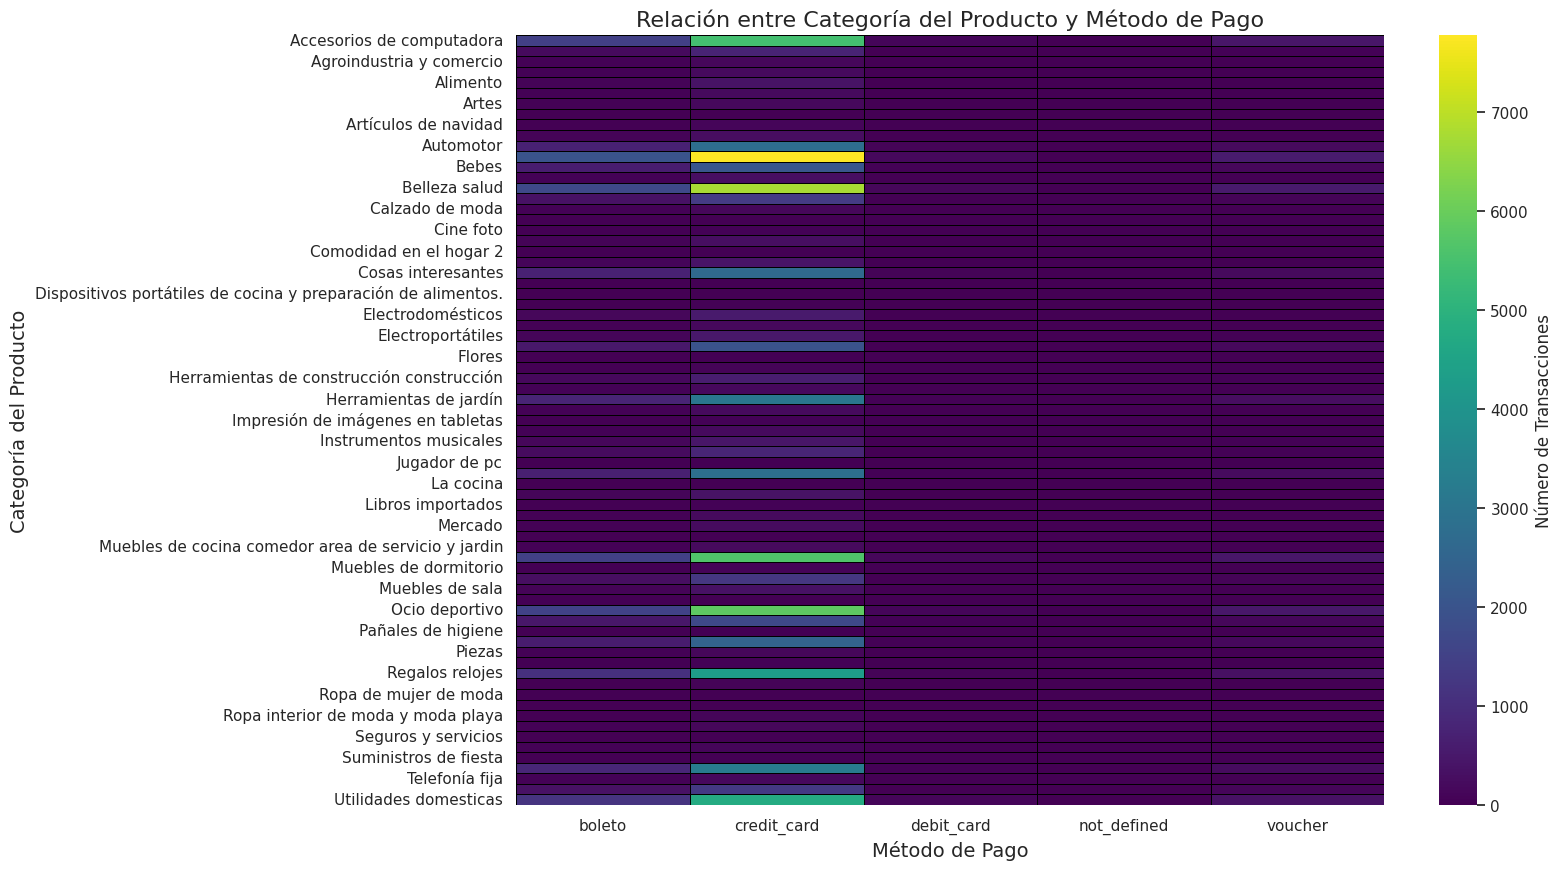

In [ ]:

# Generar crosstab
crosstab_category_payment = pd.crosstab(df_order_items_products['product_category_name'], df_order_payments['payment_type'])

# Visualizar la tabla
print(crosstab_category_payment)

# Crear una figura para el heatmap con una paleta de colores visible
plt.figure(figsize=(14, 10))
sns.heatmap(crosstab_category_payment,
            cmap='viridis',  # Usar una paleta de colores visible
            annot=False,  # No mostrar los números dentro del gráfico
            linewidths=0.5,  # Añadir líneas divisorias entre las celdas
            linecolor='black',  # Color de las líneas divisorias
            cbar_kws={'label': 'Número de Transacciones'})  # Etiqueta de la barra de color

# Configurar el título y etiquetas
plt.title('Relación entre Categoría del Producto y Método de Pago', fontsize=16)
plt.xlabel('Método de Pago', fontsize=14)
plt.ylabel('Categoría del Producto', fontsize=14)

# Mostrar el gráfico
plt.show()

Métodos de Pago Predominantes:
Tarjeta de Crédito: Es el método de pago más popular en la mayoría de las categorías de productos, con números significativamente altos en categorías como Accesorios de Computadora, Belleza y Salud, y Muebles de Decoración.

Boleto: Predomina en categorías con alta demanda de productos de gran volumen y bajo costo inicial, como Baño y Mesa de Cama y Belleza y Salud.

Tarjeta de Débito: Menos utilizada en comparación con la tarjeta de crédito, pero aún significativa en productos como Muebles de Decoración y Ocio Deportivo.

Voucher: Se utiliza de manera destacada en productos como Regalos y Muebles de Decoración, lo que puede indicar promociones o descuentos aplicados.

Categorías Populares por Método de Pago:
Accesorios de Computadora: Alta utilización de la tarjeta de crédito (5464) y también del boleto (1474), indicando un perfil de compra flexible que combina métodos de pago.

Belleza y Salud: Predomina el uso de la tarjeta de crédito (6753) y también el voucher (525), reflejando una fuerte preferencia por pagos electrónicos y promociones.

Muebles de Decoración: Alto uso de tarjeta de crédito (5639) y voucher (445), con un notable uso de tarjeta de débito (124), mostrando un interés diverso en formas de pago.

Juguetes: También presenta un alto uso de tarjeta de crédito (2842) y un significativo uso de voucher (236), sugiriendo una combinación de compras regulares y promocionales.

Tendencias Específicas por Categoría:
Automotor: Alta utilización de la tarjeta de crédito (2781) y también una cantidad considerable con boleto (710), lo que puede sugerir que los consumidores están dispuestos a financiar productos de alto valor mediante crédito.

Ocio Deportivo: Amplio uso de tarjeta de crédito (5859) y voucher (461), posiblemente debido a la alta frecuencia de compras en esta categoría.

Muebles de Oficina: Significativa compra con tarjeta de crédito (1216) y un pequeño número de compras con voucher (73), mostrando un patrón de pago más tradicional.

Categorías con Uso Mínimo de Métodos de Pago:
Libros Importados: Muy bajo uso de todos los métodos de pago, con casi nada de actividad registrada, lo que puede indicar un bajo volumen de ventas o menor popularidad de estos productos en comparación con otros.

# Recomendaciones:
Para Aumentar Ventas con Tarjeta de Débito y Voucher: Considerar incentivos adicionales o promociones para categorías donde estos métodos de pago tienen menor presencia.

Optimización de Métodos de Pago: Ajustar las estrategias de pago basadas en la popularidad de los métodos para cada categoría, como ofrecer más opciones de financiamiento para productos de alto valor.

Atención a Categorías con Bajo Uso de Métodos Definidos: Investigar las razones detrás del bajo uso de métodos de pago específicos, como posibles problemas de aceptación o falta de promoción adecuada.

# Análisis bivariable #2

#### 1. Estado vs tiquet medio

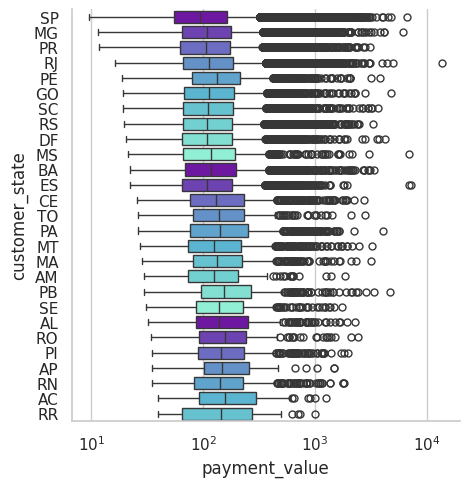

In [ ]:
# Unión de tabla customers con orders
df_ = pd.merge(
    df_customer_with_geolocation,
    df_orders,
    on = 'customer_id'
)
#unión con payments

df_ = pd.merge(
    df_,
    df_order_payments,
    on = 'order_id'
)
#Grupos a nivel de estado
df_ = (
    df_
    .groupby(['customer_state', 'order_id'], as_index = False)
    ['payment_value']
    .sum()
    .sort_values('payment_value')
)
# Tiquet medio comparado por estados
sns.catplot(
    data = df_,
    x = 'payment_value',
    y = 'customer_state',
    kind = 'box',
    palette = palette
)
plt.xscale('log')

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

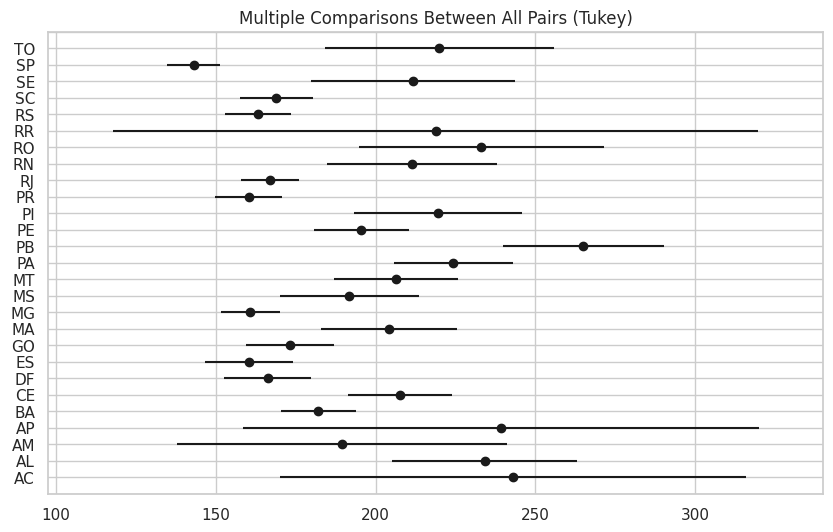

In [ ]:
pairwise_tukeyhsd(
    endog = df_['payment_value'],
    groups = df_['customer_state']
).plot_simultaneous()
plt.show()

In [ ]:
# Unión de tabla customers con orders
df_ = pd.merge(
    df_customer_with_geolocation,
    df_orders,
    on = 'customer_id'
)
#unión con payments

df_ = pd.merge(
    df_,
    df_order_payments,
    on = 'order_id'
)
#Grupos a nivel de estado
df_ = (
    df_
    .query('payment_value <= 500')
    .groupby(['customer_state', 'order_id'], as_index = False)
    ['payment_value']
    .sum()
    .groupby('customer_state')
    ['payment_value']
    .mean()
    .sort_values()
)

df_.to_markdown()

'| customer_state   |   payment_value |\n|:-----------------|----------------:|\n| SP               |         116.521 |\n| PR               |         126.534 |\n| DF               |         127.385 |\n| MG               |         128.386 |\n| ES               |         128.81  |\n| SC               |         130.191 |\n| RS               |         131.592 |\n| RJ               |         132.034 |\n| GO               |         133.655 |\n| AM               |         135.733 |\n| BA               |         136.606 |\n| MS               |         137.36  |\n| MT               |         145.432 |\n| PE               |         150.605 |\n| MA               |         154.206 |\n| PA               |         154.639 |\n| RN               |         154.819 |\n| CE               |         154.917 |\n| TO               |         155.002 |\n| SE               |         155.146 |\n| PI               |         157.683 |\n| AL               |         160.487 |\n| RO               |         165.209 |\

| customer_state   |   payment_value |
|:-----------------|----------------:|
| SP               |         116.521 |
| PR               |         126.534 |
| DF               |         127.385 |
| MG               |         128.386 |
| ES               |         128.81  |
| SC               |         130.191 |
| RS               |         131.592 |
| RJ               |         132.034 |
| GO               |         133.655 |
| AM               |         135.733 |
| BA               |         136.606 |
| MS               |         137.36  |
| MT               |         145.432 |
| PE               |         150.605 |
| MA               |         154.206 |
| PA               |         154.639 |
| RN               |         154.819 |
| CE               |         154.917 |
| TO               |         155.002 |
| SE               |         155.146 |
| PI               |         157.683 |
| AL               |         160.487 |
| RO               |         165.209 |
| RR               |         166.818 |
| PB               |         167.404 |
| AP               |         170.806 |
| AC               |         179.489 |

In [ ]:
from scipy.stats import f_oneway

#### 2. Valoración vs precio

(0.0, 500.0)

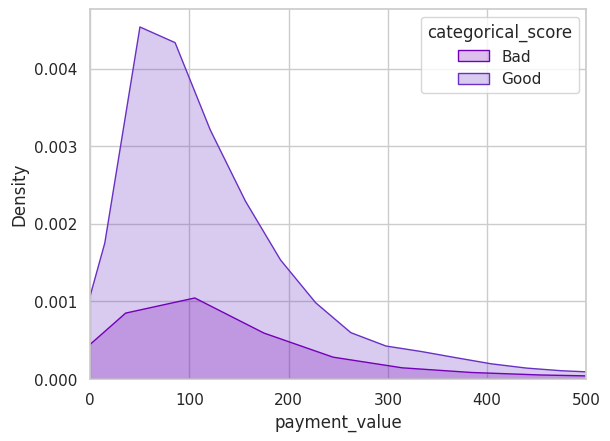

In [ ]:
#segmentación de payments a nivel de ordenes
df_ = (
    df_order_payments
    .groupby('order_id', as_index = False)
    ['payment_value']
    .sum()
)
# unión con reviews
df_ = pd.merge(
    df_,
    df_translated_reviews,
    on = 'order_id'
)
# Comparación de la valoración con el monto pagado
sns.kdeplot(
    data = df_,
    hue = 'categorical_score',
    x = 'payment_value',
    palette = palette,
    fill = True
)
plt.xlim((0, 500))

<Axes: xlabel='categorical_score', ylabel='estimation_dev'>

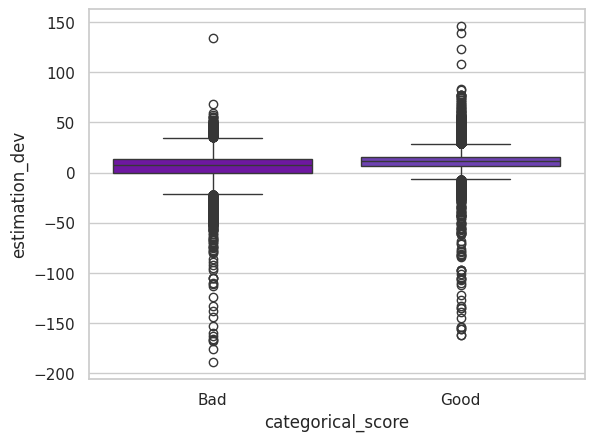

In [ ]:
# Comparación de las valoraciones con la desviación entre la fecha estimada de entrega y la entrega real
# cálculo de la desviación en número de días
dev_days = (
    df_orders.set_index('order_id')['order_estimated_delivery_date'] -
    df_orders.set_index('order_id')['order_delivered_customer_date']
).dt.days
dev_days.name = 'estimation_dev'
# unión con reviews

df_ = pd.merge(
    dev_days,
    df_translated_reviews,
    how = 'left',
    left_index = True,
    right_on = 'order_id'
).reset_index()
# Box plot
sns.boxplot(
    data = df_,
    x = 'categorical_score',
    y = 'estimation_dev',
    palette = palette
)

Se hará un análisis de varianza para comprobar estadísticamente que no hay diferencias entre los pedidos con valoración positiva y negativa con respecto a la desviación en días entre la fecha est imada de entrega y la fecha de entrega real

In [ ]:
from scipy.stats import ttest_ind, pearsonr

In [ ]:
# Separación los pedidos en dos grupos
df_ = df_.dropna()
good = df_.query('categorical_score == "Good"')['estimation_dev']
bad = df_.query('categorical_score == "Bad"')['estimation_dev']

ttest_ind(good, bad)#, nan_policy='omit')

TtestResult(statistic=74.43497199126583, pvalue=0.0, df=96357.0)

In [ ]:
df_ = df_.dropna(subset=['review_score', 'estimation_dev'])
pearsonr(df_['review_score'], df_['estimation_dev'])

PearsonRResult(statistic=0.2667636616379941, pvalue=0.0)

In [ ]:
dev_days.to_csv('/content//drive/MyDrive/e-commerce TFM/Data/desviacion_dias.csv')

En primer lugar, se va a explorar todas las variables del dataset, y se seleccionarán aquellas que sean categóricas

# Preguntas y respuestas sobre el Dataset

## ¿Cuál es la categoría de producto más vendido?

In [ ]:
# Contar el número total de unidades vendidas por producto
product_sales = df_order_items.groupby('product_id').size()
most_sold_product_id = product_sales.idxmax()
most_sold_product_qty = product_sales.max()

# Obtener el nombre del producto más vendido
most_sold_product_name = df_products[df_products['product_id'] == most_sold_product_id]['product_category_name'].values[0]

print(f'Producto más vendido: {most_sold_product_name} con {most_sold_product_qty} unidades vendidas.')

Producto más vendido: Muebles de decoracion con 527 unidades vendidas.


## ¿Cuál es el producto más caro?

In [ ]:
# Encontrar el producto más caro
most_expensive_product = df_order_items.loc[df_order_items['price'].idxmax()]
most_expensive_product_name = df_products[df_products['product_id'] == most_expensive_product['product_id']]['product_category_name'].values[0]
most_expensive_price = most_expensive_product['price']

print(f'Producto más caro: {most_expensive_product_name} con un precio de {most_expensive_price:.2f} BRL.')


Producto más caro: Utilidades domesticas con un precio de 6735.00 BRL.


## Vendedor con mejor reputación

In [ ]:
# Primero unir df_order_items con df_orders usando 'order_id'
df_orders_with_items = pd.merge(df_order_items, df_orders[['order_id']], on='order_id')

# Luego unir con df_translated_reviews usando 'order_id'
df_full = pd.merge(df_orders_with_items, df_translated_reviews[['order_id', 'review_score']], on='order_id')

# Finalmente unir con df_sellers usando 'seller_id'
df_full = pd.merge(df_full, df_sellers[['seller_id']], on='seller_id')

# Paso 2: Calcular el promedio de review_score por vendedor
df_seller_reviews = df_full.groupby('seller_id')['review_score'].mean().reset_index()

# Paso 3: Encontrar el vendedor con mejor reputación
best_seller_id = df_seller_reviews.loc[df_seller_reviews['review_score'].idxmax()]['seller_id']
best_seller_score = df_seller_reviews['review_score'].max()

# Paso 4: Calcular ventas totales para el vendedor con mejor reputación
best_seller_sales = df_full[df_full['seller_id'] == best_seller_id]['price'].sum()

# Obtener el nombre del vendedor con mejor reputación
best_seller_name = df_sellers[df_sellers['seller_id'] == best_seller_id]['seller_id'].values[0]

print(f'Vendedor con mejor reputación: {best_seller_name} con una puntuación promedio de {best_seller_score:.2f} y ventas totales de {best_seller_sales:.2f} BRL.')


Vendedor con mejor reputación: 003554e2dce176b5555353e4f3555ac8 con una puntuación promedio de 5.00 y ventas totales de 120.00 BRL.


## Vendedor que más vende

In [ ]:
# Calcular ventas totales por vendedor
df_sales_by_seller = df_order_items.groupby('seller_id')['price'].sum().reset_index()

# Encontrar el vendedor con más ventas
top_seller_id = df_sales_by_seller.loc[df_sales_by_seller['price'].idxmax()]['seller_id']
top_seller_sales = df_sales_by_seller['price'].max()
top_seller_name = df_sellers[df_sellers['seller_id'] == top_seller_id]['seller_id'].values[0]

print(f'Vendedor que más vende: {top_seller_name} con un total de ventas de {top_seller_sales:.2f} BRL.')


Vendedor que más vende: 4869f7a5dfa277a7dca6462dcf3b52b2 con un total de ventas de 229472.63 BRL.


# **Análisis de tendencias de ventas: temporal (mensual/año), por categoría de producto, y geográfica.**

## Ventas mensuales anuales

In [ ]:
# Extraer año y mes de la fecha de compra
df_orders['year_month'] = df_orders['order_purchase_timestamp'].dt.to_period('M')

# Unir datos de pedidos con datos de ventas
df_sales_monthly = pd.merge(df_order_items[['order_id', 'price']], df_orders[['order_id', 'year_month']], on='order_id')

# Calcular ventas totales por mes
df_sales_monthly_total = df_sales_monthly.groupby('year_month')['price'].sum().reset_index()

print(df_sales_monthly_total)

   year_month       price
0     2016-09      267.36
1     2016-10    49507.66
2     2016-12       10.90
3     2017-01   120312.87
4     2017-02   247303.02
5     2017-03   374344.30
6     2017-04   359927.23
7     2017-05   506071.14
8     2017-06   433038.60
9     2017-07   498031.48
10    2017-08   573971.68
11    2017-09   624401.69
12    2017-10   664219.43
13    2017-11  1010271.37
14    2017-12   743914.17
15    2018-01   950030.36
16    2018-02   844178.71
17    2018-03   983213.44
18    2018-04   996647.75
19    2018-05   996517.68
20    2018-06   865124.31
21    2018-07   895507.22
22    2018-08   854686.33
23    2018-09      145.00


## 1. Análisis Ventas totales por mes y por estacionalidad

In [ ]:

# Primero, conviertir 'year_month' a tipo datetime si es un PeriodDtype
if pd.api.types.is_period_dtype(df_sales_monthly_total['year_month']):
    # Convertir de Period a Timestamp
    df_sales_monthly_total['year_month'] = df_sales_monthly_total['year_month'].dt.to_timestamp()


df_sales_monthly_total['year_month'] = pd.to_datetime(df_sales_monthly_total['year_month'], format='%Y-%m')

# Calculamos la venta total por mes
monthly_sales = df_sales_monthly_total.groupby('year_month')['price'].sum().reset_index()

#  mes con la mayor venta total
max_sales_month = monthly_sales.loc[monthly_sales['price'].idxmax()]

# mes con la menor venta total (opcional, para comparar)
min_sales_month = monthly_sales.loc[monthly_sales['price'].idxmin()]

# Ordenar el DataFrame por total_sales en orden descendente
sorted_sales = monthly_sales.sort_values(by='price', ascending=False)

# Mostrar el mes con mayor y menor venta
print(f"Mes con mayor venta total: {max_sales_month['year_month'].strftime('%Y-%m')} con ventas de {max_sales_month['price']:.2f}")
print(f"Mes con menor venta total: {min_sales_month['year_month'].strftime('%Y-%m')} con ventas de {min_sales_month['price']:.2f}")

# Análisis adicional para identificar patrones estacionales
# Extraer el mes del año para análisis estacional
monthly_sales['month'] = monthly_sales['year_month'].dt.month

# media de ventas por mes del año
monthly_mean_sales = monthly_sales.groupby('month')['price'].mean()

# Identificar los meses con ventas por encima del promedio
average_sales = monthly_mean_sales.mean()
above_average_months = monthly_mean_sales[monthly_mean_sales > average_sales]

print(f"Meses con ventas por encima del promedio: {', '.join(map(str, above_average_months.index))}")

# Opcional: mostrar el promedio de ventas por mes
print(f"Promedio de ventas por mes: {average_sales:.2f}")

Mes con mayor venta total: 2017-11 con ventas de 1010271.37
Mes con menor venta total: 2016-12 con ventas de 10.90
Meses con ventas por encima del promedio: 3, 4, 5, 6, 7, 8, 11
Promedio de ventas por mes: 599735.16


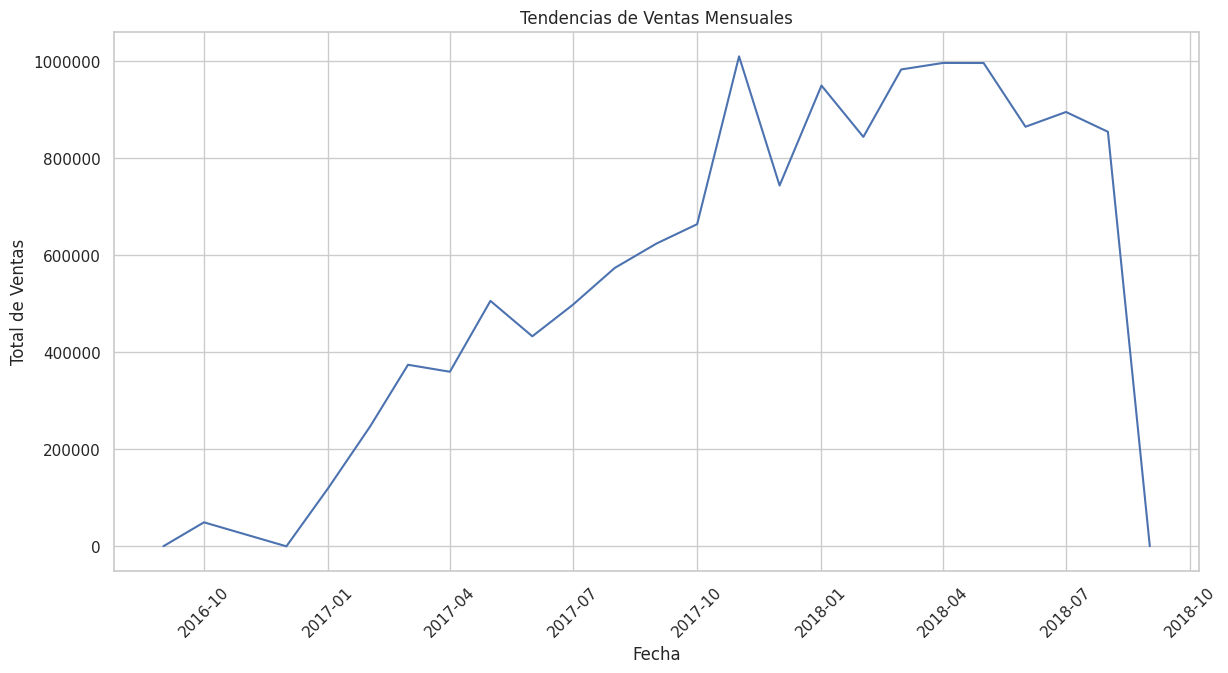

In [ ]:

# Aseguramos de que 'year_month' esté en formato datetime
df_sales_monthly_total['year_month'] = pd.to_datetime(df_sales_monthly_total['year_month'])

# Visualizar las ventas mensuales
plt.figure(figsize=(14, 7))
sns.lineplot(x='year_month', y='price', data=df_sales_monthly_total)

# Configurar el formato del eje
plt.ticklabel_format(style='plain', axis='y')

plt.title('Tendencias de Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45)
plt.show()


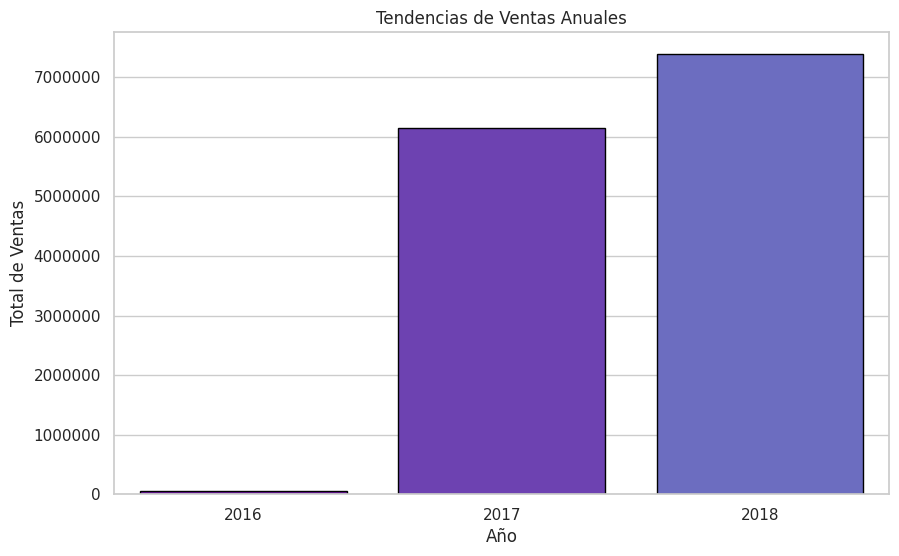

In [ ]:

# Extraer el año de 'year_month'
df_sales_monthly_total['year'] = df_sales_monthly_total['year_month'].dt.year

# Agrupar las ventas por año
df_sales_annual = df_sales_monthly_total.groupby('year')['price'].sum().reset_index()

# Visualizar las ventas anuales
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='price', data=df_sales_annual, palette = palette, edgecolor = 'black')

# Configurar el formato del eje y para evitar notación científica
plt.ticklabel_format(style='plain', axis='y')

plt.title('Tendencias de Ventas Anuales')
plt.xlabel('Año')
plt.ylabel('Total de Ventas')
plt.show()

## Insights tendencias de ventas

1. Crecimiento general de las ventas:

-Tendencia creciente: Observamos un aumento significativo en las ventas desde septiembre de 2016 hasta aproximadamente noviembre de 2017. Este crecimiento parece ser continuo, con algunos meses experimentando un incremento considerable, por ejemplo, en noviembre de 2017, cuando las ventas alcanzan un pico de 1,010,271.37.

-Estabilización: A partir de diciembre de 2017, las ventas se mantienen en niveles altos, alrededor de 900,000 y 1,000,000, hasta mayo de 2018. Esto sugiere que después de un período de crecimiento rápido, las ventas alcanzaron un nivel de estabilidad.

2. Análisis de estacionalidad:

-Patrón anual: Es posible que exista estacionalidad en las ventas. Por ejemplo, se observan incrementos en ventas en meses como noviembre de 2017 y enero de 2018. Esto puede indicar un comportamiento estacional, quizás influenciado por las festividades de fin de año o eventos promocionales.

-Caídas en ventas: Notamos algunas caídas significativas en las ventas, como en septiembre de 2016 y septiembre de 2018. Estas caídas pueden estar asociadas con factores estacionales o eventos específicos de esos meses. Aún así, creemos que los datos de septiembre 2018 no son los correctos porque la caída es muy grande y justo es donde terminan nuestros datos.

3. Picos significativos:

-Noviembre de 2017: Es el mes con el mayor valor de ventas registrado, con 1,010,271.37. Este pico podría ser un outlier o podría estar relacionado con algún evento especial, como promociones o lanzamientos de productos.

-Diciembre de 2016 y septiembre de 2018: Estos meses presentan valores de ventas inusualmente bajos (10.90 y 145.00, respectivamente), lo que podría ser el resultado de errores en la captura de datos, interrupciones en las operaciones, o situaciones excepcionales como hemos comentado anteriormente.

4. Cambios abruptos:

-Octubre de 2016: Hay un salto repentino en las ventas desde septiembre de 2016 (267.36) hasta octubre de 2016 (49,507.66). Este cambio abrupto sugiere una posible mejora en las operaciones de venta, un aumento en la demanda, o un cambio estratégico en la fijación de precios o promoción.

-Enero de 2017: Otro salto considerable se observa entre diciembre de 2016 (10.90) y enero de 2017 (120,312.87). Esta variación sugiere que diciembre de 2016 podría haber sido un mes atípico o que hubo un evento positivo significativo en enero de 2017 (festividad navideña y próximos carnavales en cada febrero).

5. Estabilidad y desaceleración:

-Periodo 2017-2018: Desde septiembre de 2017 hasta mayo de 2018, las ventas muestran una tendencia a mantenerse altas, lo que sugiere un período de estabilidad tras el crecimiento observado previamente.

-Post mayo de 2018: Aunque los datos disponibles terminan en septiembre de 2018, observamos una disminución drástica en ventas en ese mes, lo que podría indicar el inicio de una desaceleración o un evento disruptivo que afectó negativamente las ventas.

6. Análisis de puntos atípicos (outliers):

-Septiembre de 2016 y septiembre de 2018: Son meses con ventas significativamente bajas, lo que contrasta fuertemente con los meses anteriores y posteriores. Es importante investigar si estos son errores en los datos o si realmente hubo circunstancias extraordinarias en esos períodos.




-Recomendaciones para el análisis adicional:
Descomposición de la serie temporal: Para separar y analizar componentes de tendencia, estacionalidad y ruido.
Análisis de correlación con eventos externos: Como promociones, lanzamientos de productos, o cambios económicos que podrían estar correlacionados con los picos y caídas en las ventas.
Modelado predictivo: Basado en los datos de ventas pasados para prever futuras ventas y planificar estrategias de negocio.

## 2. Análisis de Ventas por Categoría de Producto

In [ ]:
# Unir órdenes con artículos de pedidos
df_orders_items = pd.merge(df_orders, df_order_items_products, on='order_id')

In [ ]:
# Esta unión ya está hecha, pero asegúrate de tener la información
df_orders_items_products = pd.merge(df_orders_items, df_products, on='product_id')

In [ ]:
# Convertir la columna 'price' a numérico (en caso de que no lo sea)
df_orders_items_products['price'] = pd.to_numeric(df_orders_items_products['price'], errors='coerce')

# Agrupar por categoría y por mes
df_sales_by_category = df_orders_items_products.groupby(['product_category_name_x', 'year_month'])['price'].sum().reset_index()

In [ ]:
# Obtener las categorías con mayores ventas
df_top_sales_by_category = df_sales_by_category.sort_values(by='price', ascending=False)


In [ ]:
#Aseguramos que 'year_month' es una fecha
print(df_top_sales_by_category['year_month'].dtype)


period[M]


In [ ]:
# Convertir a datetime si no está en el formato correcto
df_top_sales_by_category['year_month'] = pd.to_datetime(df_top_sales_by_category['year_month'], errors='coerce')



In [ ]:
print(df_top_sales_by_category['year_month'].dtype)


datetime64[ns]


In [ ]:
df_top_sales_by_category = df_top_sales_by_category.dropna(subset=['price', 'year_month'])


In [ ]:
# Convertir a datetime usando el formato adecuado si es necesario
df_top_sales_by_category['year_month'] = pd.to_datetime(df_top_sales_by_category['year_month'], errors='coerce', format='%Y-%m')


In [ ]:
# Calcular las ventas totales por categoría
total_sales_by_category = df_sales_by_category.groupby('product_category_name_x')['price'].sum().reset_index()

# Obtener las 15 categorías con mayores ventas
top_categories = total_sales_by_category.nlargest(15, 'price')['product_category_name_x']

# Filtrar solo las categorías importantes
df_top_sales_by_category = df_sales_by_category[df_sales_by_category['product_category_name_x'].isin(top_categories)]

Datos agrupados:
     product_category_name_x year_month   price
0  Accesorios de computadora 2017-02-01  479.97
1  Accesorios de computadora 2017-03-01  479.97
2  Accesorios de computadora 2017-04-01  699.95
3  Accesorios de computadora 2017-06-01  479.97
4  Accesorios de computadora 2017-07-01  839.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_category_name_x  106 non-null    object        
 1   year_month               106 non-null    datetime64[ns]
 2   price                    106 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.6+ KB
None


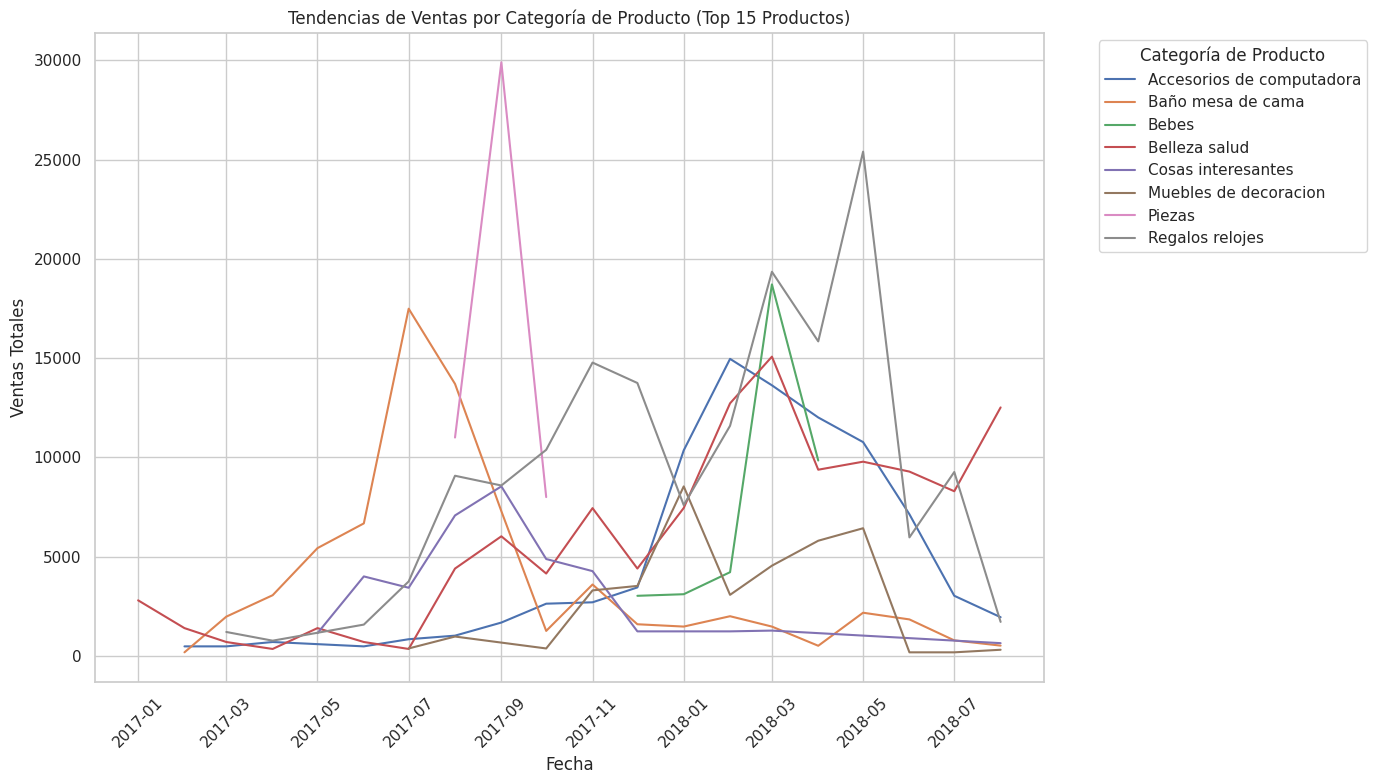

In [ ]:



# Convertir 'year_month' de Period a datetime si es necesario
if df_orders_items_products['year_month'].dtype == 'period[M]':
    df_orders_items_products['year_month'] = df_orders_items_products['year_month'].astype('datetime64[ns]')

# Asegúrate de que 'price' es numérico
df_orders_items_products['price'] = pd.to_numeric(df_orders_items_products['price'], errors='coerce')

# Calcular el total de ventas por producto
total_sales_per_product = df_orders_items_products.groupby('product_id')['price'].sum().reset_index()

# Ordenar y seleccionar los 15 productos más vendidos
top_15_products = total_sales_per_product.sort_values(by='price', ascending=False).head(15)

# Filtrar el DataFrame para incluir solo los datos de los 15 productos más vendidos
df_top_products_sales = df_orders_items_products[df_orders_items_products['product_id'].isin(top_15_products['product_id'])]

# Agrupar por categoría de producto y por 'year_month'
df_sales_by_category = df_top_products_sales.groupby(['product_category_name_x', 'year_month'])['price'].sum().reset_index()

# Verificar el DataFrame antes de graficar
print("Datos agrupados:")
print(df_sales_by_category.head())
print(df_sales_by_category.info())

# Asegurarse de que 'product_category_name_x' es una categoría
df_sales_by_category['product_category_name_x'] = pd.Categorical(df_sales_by_category['product_category_name_x'])

# Crear gráfico de tendencias de ventas
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_sales_by_category, x='year_month', y='price', hue='product_category_name_x')
plt.title('Tendencias de Ventas por Categoría de Producto (Top 15 Productos)')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend(title='Categoría de Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Ajustamos al top 8 productos más vendidos

Datos agrupados:
     product_category_name_x year_month   price
0  Accesorios de computadora 2017-02-01  479.97
1  Accesorios de computadora 2017-03-01  479.97
2  Accesorios de computadora 2017-04-01  699.95
3  Accesorios de computadora 2017-06-01  479.97
4  Accesorios de computadora 2017-07-01  839.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_category_name_x  76 non-null     object        
 1   year_month               76 non-null     datetime64[ns]
 2   price                    76 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.9+ KB
None


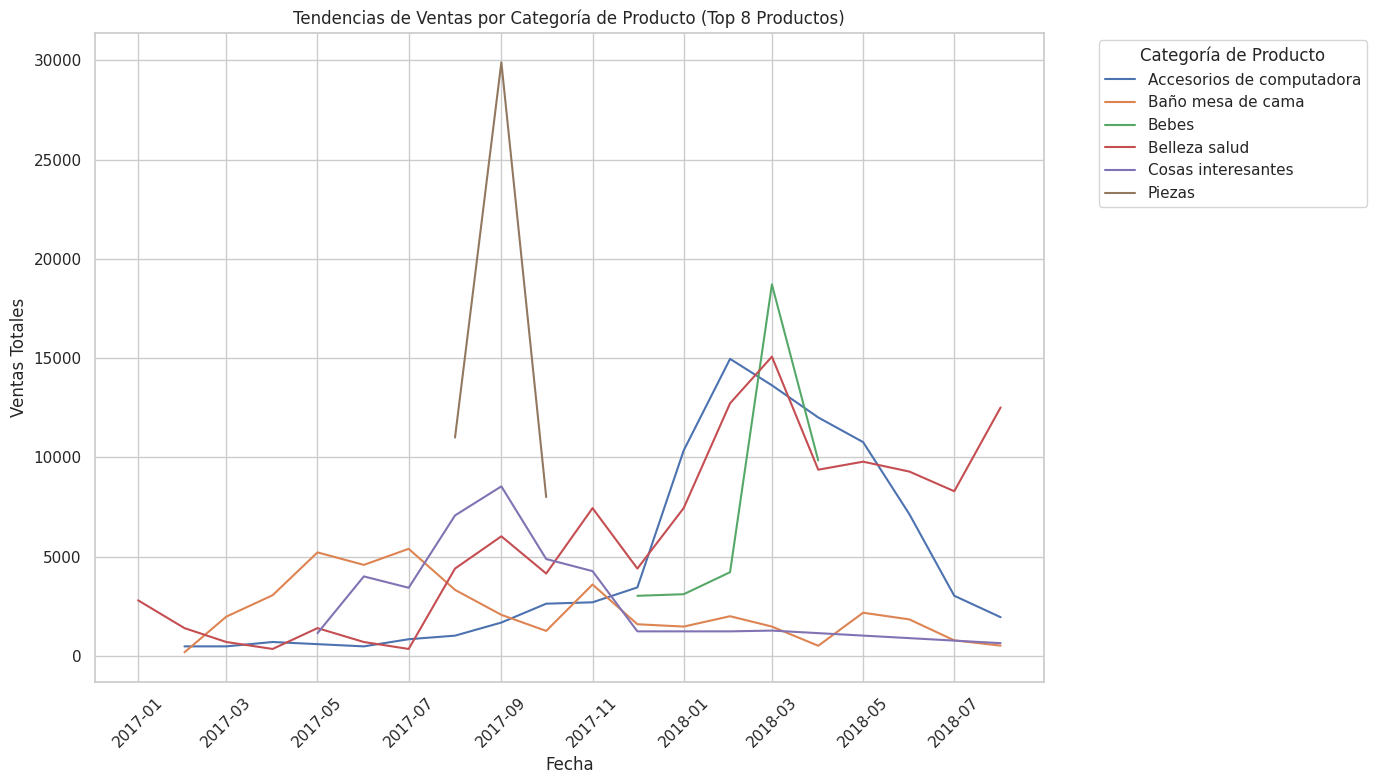

In [ ]:


# Supongamos que df_orders_items_products ya está disponible

# Convertir 'year_month' de Period a datetime si es necesario
if df_orders_items_products['year_month'].dtype == 'period[M]':
    df_orders_items_products['year_month'] = df_orders_items_products['year_month'].astype('datetime64[ns]')

# Asegúrate de que 'price' es numérico
df_orders_items_products['price'] = pd.to_numeric(df_orders_items_products['price'], errors='coerce')

# Calcular el total de ventas por producto
total_sales_per_product = df_orders_items_products.groupby('product_id')['price'].sum().reset_index()

# Ordenar y seleccionar los 8 productos más vendidos
top_8_products = total_sales_per_product.sort_values(by='price', ascending=False).head(8)

# Filtrar el DataFrame para incluir solo los datos de los 8 productos más vendidos
df_top_products_sales = df_orders_items_products[df_orders_items_products['product_id'].isin(top_8_products['product_id'])]

# Agrupar por categoría de producto y por 'year_month'
df_sales_by_category = df_top_products_sales.groupby(['product_category_name_x', 'year_month'])['price'].sum().reset_index()

# Verificar el DataFrame antes de graficar
print("Datos agrupados:")
print(df_sales_by_category.head())
print(df_sales_by_category.info())

# Asegurarse de que 'product_category_name_x' es una categoría
df_sales_by_category['product_category_name_x'] = pd.Categorical(df_sales_by_category['product_category_name_x'])

# Crear gráfico de tendencias de ventas
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_sales_by_category, x='year_month', y='price', hue='product_category_name_x')
plt.title('Tendencias de Ventas por Categoría de Producto (Top 8 Productos)')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend(title='Categoría de Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Visión General de Ventas por Categoría

Aquí están los ingresos totales por cada una de las 8 categorías de productos más vendidas (en BRL, REAL BRASILEÑO):

Belleza y salud: R$1.247.137,68

Regalos y relojes: R$1.193.012,75

Ocio deportivo: R$980.529,82

Baño y mesa de cama: R$1.029.350,69

Accesorios de computadora: R$903.870,74

Muebles de decoración: R$724.317,65

Utilidades domésticas: R$626.926,38

Cosas interesantes: R$632.343,13

-Insight: La categoría "Belleza salud" es la que más ingresos ha generado, seguida de cerca por "Regalos relojes" y "Baño mesa de cama". Las categorías con menos ingresos son "Cosas interesantes" y "Utilidades domésticas".

##  Análisis de Tendencias por Categoría

-Accesorios de computadora: Hay una tendencia de crecimiento en 2017, con picos en los meses de verano y finales del año.

-Baño mesa de cama: Las ventas son estables pero con picos en ciertos meses. La categoría muestra una tendencia de crecimiento, especialmente a finales de 2017.

-Belleza salud: Esta categoría tiene una tendencia de crecimiento muy fuerte a lo largo del tiempo, con picos significativos, especialmente en 2018.

-Cosas interesantes: Las ventas muestran variaciones mensuales, con ciertos meses que tienen un rendimiento notablemente alto.

-Muebles de decoración: Las ventas son más variables, con algunos picos en el año, pero sin una tendencia clara de crecimiento.

-Ocio deportivo: Las ventas muestran una tendencia de crecimiento a lo largo del tiempo, con picos en algunos meses.

-Regalos relojes: Las ventas muestran una fuerte tendencia de crecimiento con picos en los últimos meses de 2017 y principios de 2018.

Utilidades domésticas: Las ventas son relativamente estables, con algunos picos pero sin una tendencia clara de crecimiento.

## Conclusiones

Categorías Populares: Las categorías "Belleza salud" y "Regalos relojes" son las más exitosas en términos de ingresos totales, seguidas por "Ocio deportivo" y "Baño mesa de cama".

Tendencias Temporales: Algunas categorías como "Accesorios de computadora" y "Ocio deportivo" muestran una tendencia clara de crecimiento, mientras que otras como "Muebles de decoración" tienen ventas más estables.

Oportunidades de Crecimiento: Las categorías que muestran una tendencia creciente en ventas podrían beneficiarse de estrategias de marketing adicionales para aprovechar la tendencia positiva.

## 3. Análisis Geográfico de Ventas


In [ ]:
#Como está en tipo 'Period', lo cambiamos a datetime
df_sales_monthly['year_month'] = df_sales_monthly['year_month'].dt.to_timestamp()


In [ ]:
# Unir df_sales_monthly con df_customer_geolocation_orders usando 'order_id'
df_sales_with_location = pd.merge(df_sales_monthly, df_customer_geolocation_orders[['order_id', 'customer_state']], on='order_id')


In [ ]:
# Agrupar por estado y mes, y sumar las ventas
sales_by_state_month = df_sales_with_location.groupby(['customer_state', 'year_month'])['price'].sum().reset_index()

# Ver los datos resultantes
print(sales_by_state_month.head())


  customer_state year_month    price
0             AC 2017-01-01   589.60
1             AC 2017-02-01   450.40
2             AC 2017-03-01   455.99
3             AC 2017-04-01  1162.38
4             AC 2017-05-01  2094.39


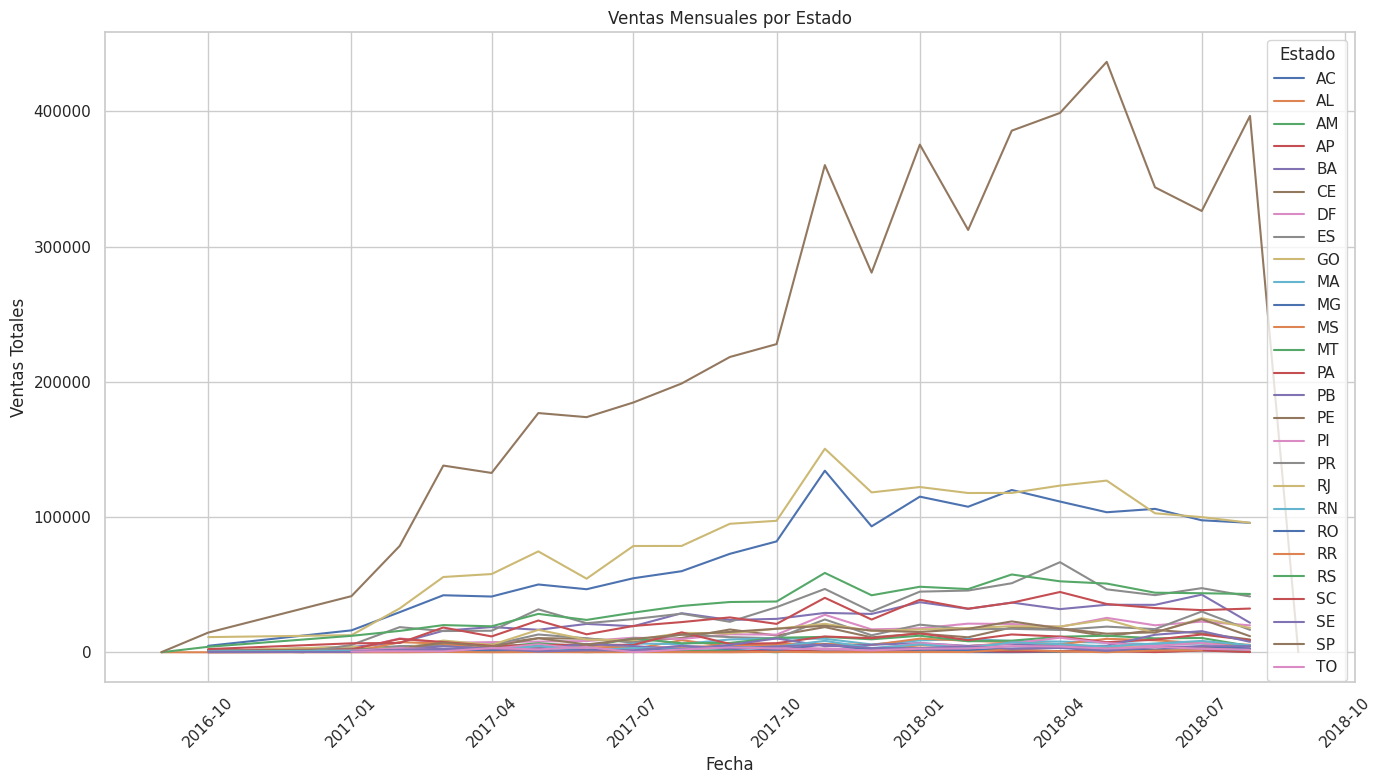

In [ ]:
# Configurar el gráfico
plt.figure(figsize=(14, 8))

# Graficar ventas por estado
for state in sales_by_state_month['customer_state'].unique():
    state_data = sales_by_state_month[sales_by_state_month['customer_state'] == state]
    plt.plot(state_data['year_month'], state_data['price'], label=state)

# Configurar detalles del gráfico
plt.title('Ventas Mensuales por Estado')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend(title='Estado')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Ajustamos al top 8 estados más importantes

In [ ]:
# Calcular ventas totales por estado
total_sales_by_state = sales_by_state_month.groupby('customer_state')['price'].sum().reset_index()

# Ordenar por ventas totales en orden descendente y seleccionar los 8 estados principales
top_8_states = total_sales_by_state.sort_values(by='price', ascending=False).head(8)['customer_state']

print("Top 8 estados con mayores ventas:", top_8_states)


Top 8 estados con mayores ventas: 25    SP
18    RJ
10    MG
22    RS
17    PR
23    SC
4     BA
6     DF
Name: customer_state, dtype: object


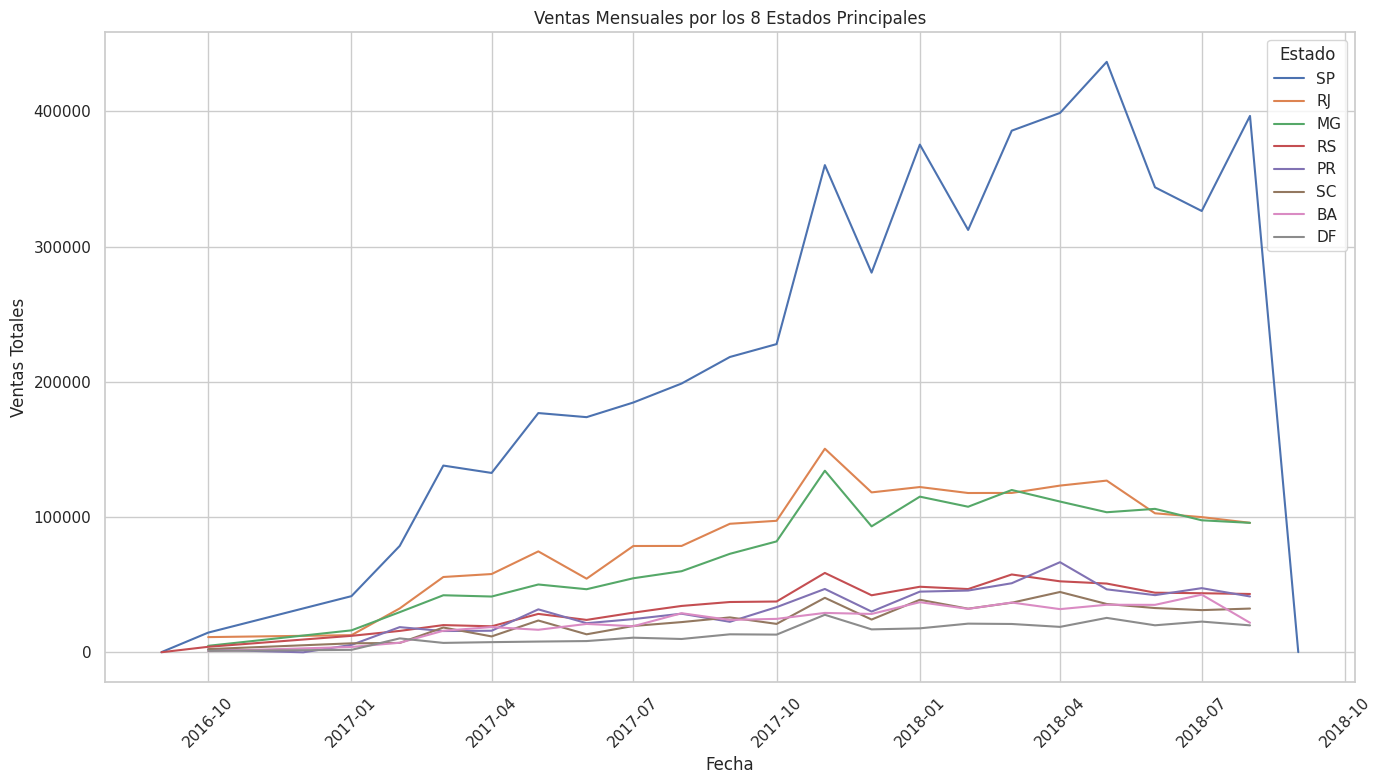

In [ ]:
# Filtrar los datos para los 8 estados principales
filtered_sales_by_state_month = sales_by_state_month[sales_by_state_month['customer_state'].isin(top_8_states)]

# Configurar el gráfico
plt.figure(figsize=(14, 8))

# Graficar ventas por estado
for state in top_8_states:
    state_data = filtered_sales_by_state_month[filtered_sales_by_state_month['customer_state'] == state]
    plt.plot(state_data['year_month'], state_data['price'], label=state)

# Configurar detalles del gráfico
plt.title('Ventas Mensuales por los 8 Estados Principales')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend(title='Estado')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
# Combinar df_customer_geolocation_orders con df_order_items_products para obtener la columna 'price'
df_combined = df_customer_geolocation_orders.merge(df_order_items_products[['order_id', 'price']], on='order_id', how='left')

# Verificar la combinación
print(df_combined.head())


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

  customer_zip_code_prefix customer_state geolocation_zip_code_prefix  \
0                    14409             SP                       14409   
1                    09790             SP                       09790   
2                    01151             SP                       01151   
3                    08775             SP                       08775   
4                    13056             SP                       13056   

   geolocation_lat  geolocation_lng          customer_city country  \
0       -20.499273       -47.396658                 

In [ ]:
# Resumir las ventas totales por estado
total_sales_by_state = df_combined.groupby('customer_state')['price'].sum().reset_index()
total_sales_by_state = total_sales_by_state.sort_values(by='price', ascending=False)
print("Ventas Totales por Estado:")
print(total_sales_by_state)


Ventas Totales por Estado:
   customer_state       price
25             SP  5135760.45
18             RJ  1800192.06
10             MG  1567073.68
22             RS   741923.62
17             PR   674586.53
23             SC   513289.79
4              BA   505043.06
6              DF   299902.13
8              GO   285932.07
7              ES   273423.04
15             PE   258650.40
5              CE   223708.04
13             PA   169768.85
12             MT   155411.13
9              MA   118047.30
11             MS   116176.68
14             PB   112476.74
16             PI    86339.91
19             RN    82456.44
1              AL    79739.83
24             SE    58747.10
26             TO    49109.75
20             RO    45560.98
2              AM    21815.04
0              AC    15916.05
3              AP    13474.30
21             RR     7583.45


In [ ]:
df_combined

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,customer_city,country,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,SP,14409,-20.499273,-47.396658,Franca,Brazil,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,SP,09790,-23.728495,-46.542128,Sao Bernardo do Campo,Brazil,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,SP,01151,-23.531143,-46.656816,Sao Paulo,Brazil,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,SP,08775,-23.500670,-46.186348,Mogi das Cruzes,Brazil,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,SP,13056,-22.975708,-47.143140,Campinas,Brazil,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,230.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112431,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,03937,SP,03937,-23.586244,-46.499542,Sao Paulo,Brazil,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,74.90
112432,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,06764,SP,06764,-23.616873,-46.767500,Taboao da Serra,Brazil,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,114.90
112433,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,CE,60115,-3.735628,-38.510775,Fortaleza,Brazil,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,37.00
112434,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,RS,92120,-29.949964,-51.168380,Canoas,Brazil,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,689.00


## Ventas por Estado a lo largo del tiempo (los 10 Estados más importantes)

1. **São Paulo**

Mes con más ventas: Noviembre 2017 (78,958.21 BRL)

Tendencias: São Paulo presenta un crecimiento continuo en ventas durante 2017, con picos en noviembre y diciembre. Las ventas siguen siendo elevadas en 2018, con algunas fluctuaciones menores.

2. **Minas Gerais**

Mes con más ventas: Noviembre 2017 (125,891.62 BRL)

Tendencias: Minas Gerais muestra picos altos en ventas desde julio 2017, con el punto más alto en noviembre 2017. Las ventas permanecen elevadas en 2018 con fluctuaciones menores.

3. **Rio de Janeiro**

Mes con más ventas: Diciembre 2017 (67,057.68 BRL)

Tendencias: Las ventas en Río de Janeiro aumentan significativamente en diciembre 2017, con una tendencia ascendente constante desde principios de 2017. Las ventas siguen siendo altas en 2018, aunque con ligeras fluctuaciones.

4. **Ceará**

Mes con más ventas: Enero 2018 (24,404.72 BRL)

Tendencias: Las ventas muestran un crecimiento significativo desde principios de 2017, con picos importantes en noviembre 2017 y enero 2018. Luego hay una caída en la primavera de 2018, pero las ventas se mantienen relativamente altas.

5. **Bahia**

Mes con más ventas: Diciembre 2017 (35,731.82 BRL)

Tendencias: Las ventas en Bahia muestran picos continuos desde junio 2017, alcanzando el punto máximo en diciembre 2017 y enero 2018. Las ventas disminuyen ligeramente en los meses siguientes, con algunos picos de recuperación a mediados de 2018.

6. **Distrito Federal**

Mes con más ventas: Febrero 2018 (25,443.50 BRL)

Tendencias: Las ventas en el Distrito Federal muestran un fuerte aumento desde finales de 2017, con picos en febrero 2018 y abril 2018. Hay una tendencia ascendente con algunas fluctuaciones, y una caída en los meses de verano de 2018.

7. **Paraná**

Mes con más ventas: Noviembre 2017 (18,543.52 BRL)

Tendencias: Paraná presenta un crecimiento constante con picos en noviembre 2017 y diciembre 2017. Las ventas se mantienen relativamente estables con algunas fluctuaciones menores durante 2018.

8. **Pernambuco**

Mes con más ventas: Noviembre 2017 (26,119.49 BRL)

Tendencias: Las ventas en Pernambuco aumentan significativamente desde mediados de 2017, con picos en noviembre 2017 y enero 2018. Las ventas son consistentemente altas, con algunas fluctuaciones menores en el primer semestre de 2018.

9. **Goiás**

Mes con más ventas: Marzo 2018 (27,908.99 BRL)

Tendencias: Goiás muestra una tendencia ascendente con picos en marzo 2018 y junio 2018. Las ventas suben considerablemente en 2017 y alcanzan su punto máximo en la primavera de 2018, con fluctuaciones menores durante el año.

10. **Amazonas**

Mes con más ventas: Diciembre 2017 (3,342.98 BRL)

Tendencias: Las ventas en Amazonas tienen picos en diciembre 2017 y agosto 2018. Muestran cierta estabilidad con fluctuaciones a lo largo de los meses, pero los valores altos se concentran hacia el final de 2017 y verano de 2018.

## Conclusiones

São Paulo y Minas Gerais como Líderes: São Paulo y Minas Gerais se destacan claramente como los estados con las ventas más altas. São Paulo mantiene un nivel de ventas consistente y alto a lo largo de 2017 y 2018, mientras que Minas Gerais presenta picos significativos en ventas, especialmente en noviembre 2017. Ambos estados muestran una fuerte presencia en el mercado, sugiriendo que son mercados clave para cualquier estrategia de ventas.

Picos en el Fin del Año: La mayoría de los estados muestran un incremento notable en las ventas hacia el final de 2017, con picos en noviembre y diciembre. Esto sugiere una estacionalidad en el mercado que podría estar vinculada a eventos de compras de fin de año, promociones o campañas específicas que atraen a más consumidores durante estos meses.

Fluctuaciones en 2018: A partir de 2018, varios estados experimentan fluctuaciones en las ventas, con algunos picos en meses específicos como enero y marzo. Esto indica que las ventas pueden estar influenciadas por factores estacionales, promociones o cambios en el comportamiento del consumidor a lo largo del año.

Crecimiento y Estabilidad Regional: Estados como Ceará, Bahia y Pernambuco muestran un crecimiento significativo en 2017 con picos en noviembre y diciembre. Aunque las ventas en estos estados son elevadas, también experimentan fluctuaciones en 2018. Esto puede indicar un mercado en expansión pero con variabilidad en la demanda.

Diferencias Regionales: Los estados del Norte y Nordeste, como Amazonas y Pernambuco, tienen patrones de ventas distintos comparados con los del Sudeste, como São Paulo y Río de Janeiro. Esto sugiere que las estrategias de venta y marketing podrían necesitar ajustes específicos para adaptarse a las diferencias regionales en el comportamiento del consumidor.

Importancia de las Estrategias de Fin de Año: La concentración de ventas altas en noviembre y diciembre resalta la importancia de planificar estrategias de marketing y ventas que capitalicen las oportunidades de fin de año. Las campañas dirigidas a maximizar las ventas durante estos meses podrían ser particularmente efectivas.


## Segmentación de clientes

In [ ]:
#segmentación basada en frecuencia de compra, valor del ticket promedio y categoría de produto preferida

#Frecuencia de compra

df_ = pd.merge(
    df_orders,
    df_customer_with_geolocation[['customer_id', 'customer_unique_id']],
    on = 'customer_id'
)

years = (df_['order_purchase_timestamp'].max() - df_['order_purchase_timestamp'].min()).days / 365

frequency = (
    df_
    .set_index('customer_unique_id')
    .groupby('customer_unique_id')
    ['order_purchase_timestamp']
    .size()
    .divide((df_['order_purchase_timestamp'].max() - df_['order_purchase_timestamp'].min()).days / 365)
    .rename('frecuencia')
)



In [ ]:
#Valor del ticket medio
df_ = pd.merge(
    df_customer_geolocation_orders,
    df_order_payments,
    on = 'order_id'
)

mean_ticket = (
    df_
    .groupby(['order_id', 'customer_unique_id'], as_index = False)
    ['payment_value']
    .sum()
    .groupby('customer_unique_id')
    ['payment_value']
    .mean()
    .rename('ticket_promedio')
)

In [ ]:
#categoría preferida
df_ = pd.merge(
    df_customer_geolocation_orders,
    df_order_items,
    on = 'order_id'
)

df_ = pd.merge(
    df_,
    df_products,
    on = 'product_id'
)

categories = (
    df_
    .groupby('customer_unique_id')
    ['product_category_name']
    .agg(lambda x: pd.Series.mode(x)[0])
    .rename('categoria_preferida')
)

In [ ]:
#Unión de todas las segmentaciones
df_segmented_customers = pd.concat([
    frequency,
    mean_ticket,
    categories
], axis = 1)

In [ ]:
df_segmented_customers.to_csv('/content//drive/MyDrive/e-commerce TFM/Data/df_segmented_customers.csv')

Text(0.5, 1.0, 'Frecuencia de compra de clientes')

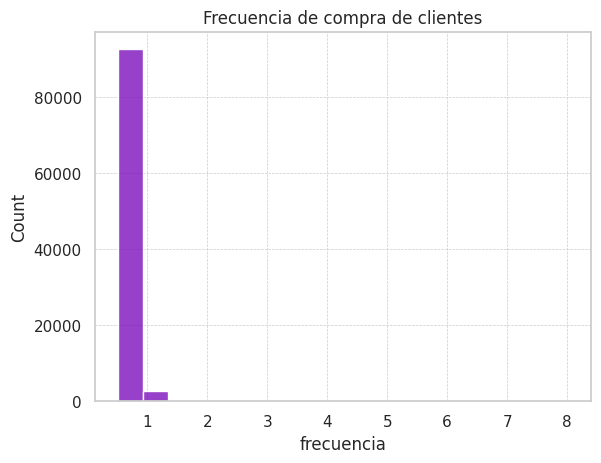

In [ ]:
sns.histplot(
    data = df_segmented_customers,
    x = 'frecuencia',
    # fill = True,
    color = '#7400b8'
)
plt.grid(ls = '--', lw = 0.5)
plt.title('Frecuencia de compra de clientes')

Text(0.5, 1.0, 'Ticket medio')

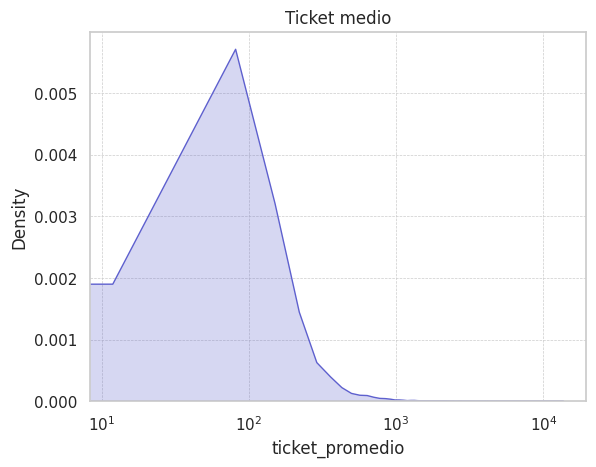

In [ ]:
sns.kdeplot(
    data = df_segmented_customers,
    x = 'ticket_promedio',
    fill = True,
    color = '#5e60ce'
)
plt.xscale('log')
plt.grid(ls = '--', lw = 0.5)
plt.title('Ticket medio')

In [ ]:
df_ = (
    df_segmented_customers
    .reset_index()
    .groupby('categoria_preferida', as_index = False)
    .size()
    .nlargest(10, 'size')
)
df_

,categoria_preferida,size
11,Baño mesa de cama,9058
14,Belleza salud,8593
54,Ocio deportivo,7321
0,Accesorios de computadora,6530
49,Muebles de decoracion,6002
72,Utilidades domesticas,5540
60,Regalos relojes,5397
69,Telefonía,4040
10,Automotor,3819
41,Juguetes,3745


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Baño mesa de cama'),
  Text(1, 0, 'Belleza salud'),
  Text(2, 0, 'Ocio deportivo'),
  Text(3, 0, 'Accesorios de computadora'),
  Text(4, 0, 'Muebles de decoracion'),
  Text(5, 0, 'Utilidades domesticas'),
  Text(6, 0, 'Regalos relojes'),
  Text(7, 0, 'Telefonía'),
  Text(8, 0, 'Automotor'),
  Text(9, 0, 'Juguetes')])

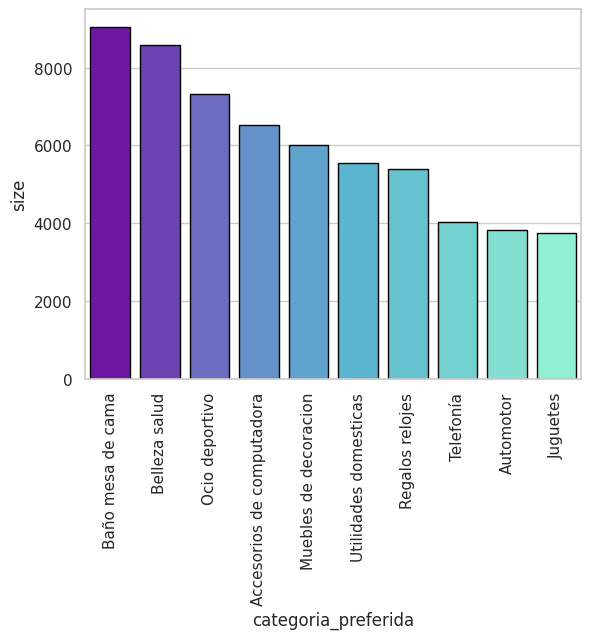

In [ ]:
sns.barplot(
    data = df_,
    x = 'categoria_preferida',
    y = 'size',
    palette = palette,
    edgecolor = 'black'
)
plt.xticks(rotation = 90)